<a href="https://colab.research.google.com/github/SqweeksOp/AV-Job-a-thon/blob/main/DFS_training_Distributor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl

import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
path="/content/drive/MyDrive/Project_data/DFS_Data/Distributor/Train/"
count=0
print("Loading Data...")
for filename in os.listdir("/content/drive/MyDrive/Project_data/DFS_Data/Distributor/Train"):
    if filename.endswith(".csv"):
      if count==0:
        df1=pd.read_csv(path+filename,index_col=0)
      else:
        df=pd.read_csv(path+filename,index_col=0)
        df1=df1.append(df)
      if count==2000:
        break
      count+=1
print(count)

Loading Data...
2000


In [6]:
import os
path="/content/drive/MyDrive/Project_data/DFS_Data/Distributor/Test/"
count=0
print("Loading Data...")
for filename in os.listdir("/content/drive/MyDrive/Project_data/DFS_Data/Distributor/Test"):
    if filename.endswith(".csv"):
      if count==0:
        df_test=pd.read_csv(path+filename,index_col=0)
      else:
        df=pd.read_csv(path+filename,index_col=0)
        df_test=df_test.append(df)
      if count==500:
        break
      count+=1
print(count)

Loading Data...
499


In [7]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               69.0  ...         5.0        1.0
9    9.0               11.0  ...        75.0        0.0
10  10.0               60.0  ...        42.0        0.0
11  11.0               89.0  ...         0.0        1.0
12  12.0               75.0  ...         0.0        1.0

[5 rows x 14 columns]

In [8]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               71.0  ...         0.0        1.0
9    9.0                0.0  ...        66.0        0.0
10  10.0               82.0  ...         6.0        1.0
11  11.0               66.0  ...         0.0        0.0
12  12.0               78.0  ...         7.0        1.0

[5 rows x 14 columns]

In [9]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [10]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (70035, 13)
shape of test set  set is (17465, 13)
shape of train labels  set is (70035,)
shape of test labels  set is (17465,)


- Remove Correlated filter

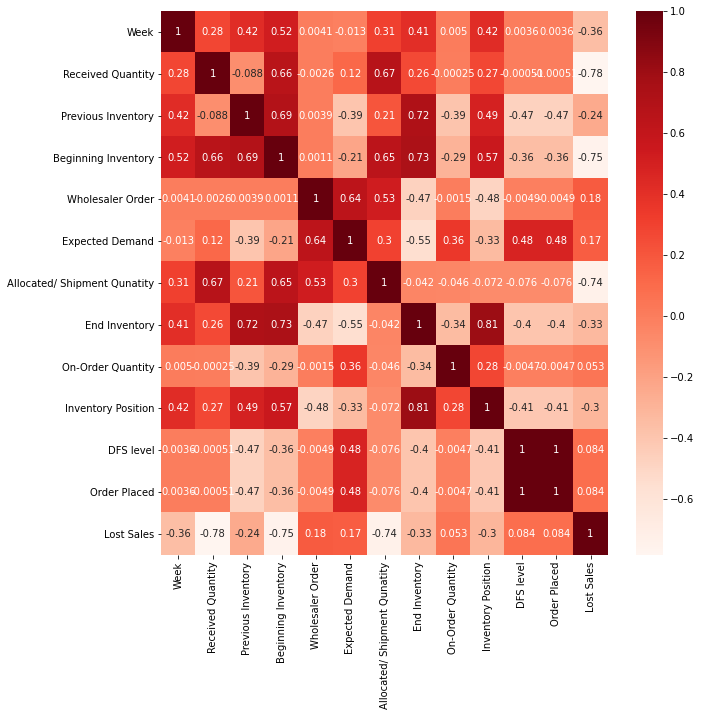

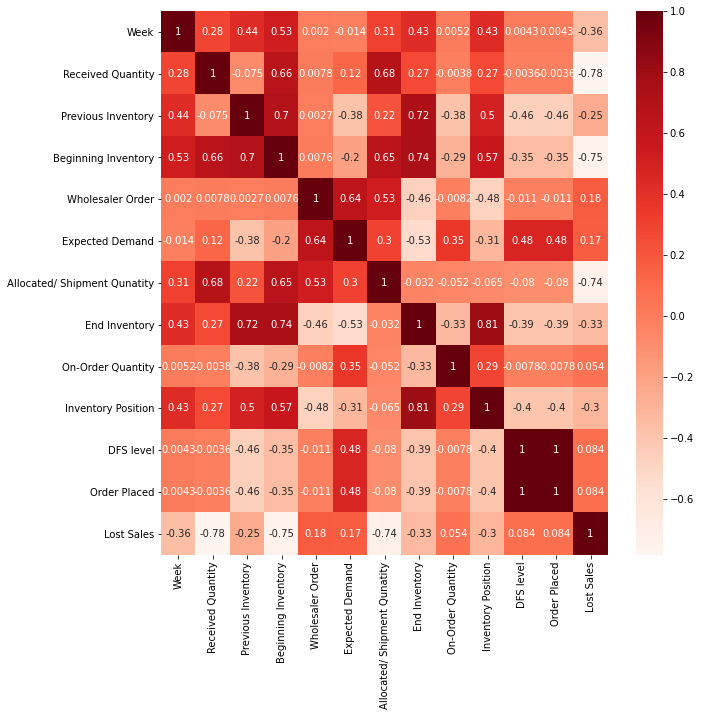

In [11]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Customer Demand', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS Level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [ ]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS Level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS Level"],axis =1 )


In [ ]:
X_train.head()

Week  Received Quantity  ...  Inventory Position  Lost Sales
8    8.0               11.0  ...               102.0        60.0
9    9.0               60.0  ...                75.0        19.0
10  10.0               75.0  ...                85.0        18.0
11  11.0               25.0  ...                79.0        53.0
12  12.0               60.0  ...                93.0        37.0

[5 rows x 9 columns]

In [ ]:
X_train.shape

(70035, 9)

In [ ]:
X_test.shape

(17465, 9)

- Correlation


In [12]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 70035
    Positive: 12379 (17.68% of total)



In [13]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, po, 100 * po / tot))

Examples:
    Total: 17465
    Positive: 3115 (17.84% of total)



In [14]:
!pip install imbalanced-learn

In [15]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [16]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [17]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 57656, 1: 12379})


Counter({0: 14350, 1: 3115})

OVER and Under Sampling pipeline

OVER SAMPLING

In [18]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.50)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 57656, 1: 28828})


UNDER SAMPLING

In [19]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 28828, 1: 28828})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [20]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
57646  1
57647  1
57648  1
57649  1
57650  1
57651  1
57652  1
57653  1
57654  1
57655  1

In [21]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0          1          2   ...         10         11         12
57626  21.407917  87.592083   6.407917  ...  79.407917  79.407917   0.000000
57627  15.984066  82.328022   0.000000  ...  98.320055  98.320055   1.671978
57628  17.000000  64.367070  29.632930  ...  74.000000  74.000000   4.326586
57629  13.476511  86.000000  22.476511  ...  66.906043  66.906043   0.000000
57630   9.483324  68.258338   0.000000  ...  81.741662  81.741662  12.483324
57631  19.962246  63.708892  47.582216  ...  66.708892  66.708892   0.000000
57632  28.999969  67.000010  13.999990  ...  80.000000  80.000000   2.499974
57633   9.000000   2.518081   9.642559  ...  64.000000  64.000000  67.678721
57634  31.326886  73.326886  50.534623  ...  70.465377  70.465377   0.000000
57635  39.132629  91.000000  18.720423  ...  77.573474  77.573474   0.000000
57636  10.900954  86.132061   0.000000  ...  83.099046  83.099046   0.000000
57637  16.042492  89.276677   0.000000  ...  85.042492  85.042492   0.000000
57638  11.000000  81.320931   6.559690  ...  74.000000  74.000000   1.119380
57639  36.870127  75.021646  25.978354  ...  83.021646  83.021646   0.000000
57640  12.505433  89.516300   0.000000  ...  72.505433  72.505433   2.505433
57641  20.992839  88.003580   0.000000  ...  86.996420  86.996420   1.003580
57642  10.224203  79.775797   0.000000  ...  73.775797  73.775797  12.551595
57643  24.354489  66.387306  22.870898  ...  75.612694  75.612694   3.000000
57644  31.190392  67.773799  54.452402  ...  79.773799  79.773799   0.000000
57645  14.239287  80.507142   4.492858  ...  71.239287  71.239287   2.507142
57646  22.344486  90.311029   0.000000  ...  94.311029  94.311029   0.000000
57647  32.989640  76.996115  27.002590  ...  82.003885  82.003885   0.000000
57648   8.000000  85.956791   0.000000  ...  75.000000  75.000000   0.000000
57649  13.494477  68.000000   0.249080  ...  77.750920  77.750920  22.252761
57650   9.000000  16.820519   0.820519  ...  74.589740  74.589740  53.000000
57651  38.785894  81.571788  19.357682  ...  73.143576  73.143576   0.000000
57652  18.860994  87.147992  20.426004  ...  71.286998  71.286998   0.000000
57653  32.797765  81.202235  26.202235  ...  73.191059  73.191059   0.000000
57654  20.706714  67.000000  24.586572  ...  80.706714  80.706714   0.000000
57655   8.000000  77.488881   0.000000  ...  89.511119  89.511119   0.000000

[30 rows x 13 columns]

In [22]:
X_train.shape

(57656, 13)

In [23]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 57656
    Positive: 28828 (50.00% of total)



In [24]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.1)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [25]:
train_df.shape

(51890, 13)

In [26]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 51890
    Positive: 25960 (50.03% of total)



In [27]:
a=pd.DataFrame(bool_train_labels)
a.shape

(51890, 1)

In [28]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (51890,)
Validation labels shape: (5766,)
Test labels shape: (17465,)
Training features shape: (51890, 13)
Validation features shape: (5766, 13)
Test features shape: (17465, 13)


In [29]:
from sklearn.decomposition import PCA

In [30]:


var_ratio={}
for n in range(2,10):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [31]:
var_ratio

{2: 0.5824635943310138,
 3: 0.7254973630804118,
 4: 0.8354412777335591,
 5: 0.9325219980732319,
 6: 0.9673074079387123,
 7: 0.9917346097332101,
 8: 0.9999487004276536,
 9: 0.9999995908701003}

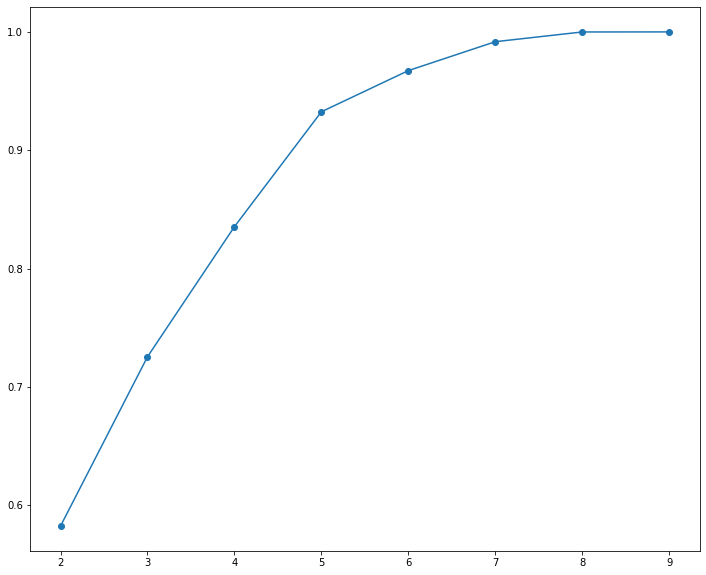

In [32]:
pd.Series(var_ratio).plot(marker="o")

In [33]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[-0.45097175, -0.29485507,  0.15110673, -0.5651114 , -0.49940042,
         0.17472747],
       [-2.45293932, -1.36576538,  2.18515957, -0.65727405,  1.33517267,
         0.23441023],
       [ 0.72136047,  1.5731595 ,  1.24247773, -1.26210046,  0.47140495,
        -0.37337121],
       ...,
       [-0.92265194,  0.19856878,  1.21511381, -0.8868423 ,  0.13430918,
         0.3503245 ],
       [ 0.97540654,  1.8777504 , -0.34971812, -0.875969  , -0.30821003,
         0.53346869],
       [ 1.96118097,  0.78554516, -1.66747094,  1.07871403,  0.33172151,
         0.62083499]])

In [34]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [35]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2         3         4         5
0     -0.450972 -0.294855  0.151107 -0.565111 -0.499400  0.174727
1     -2.452939 -1.365765  2.185160 -0.657274  1.335173  0.234410
2      0.721360  1.573159  1.242478 -1.262100  0.471405 -0.373371
3     -1.220135  0.556625 -1.124900  1.300624  0.017889  0.884714
4     -0.226334  0.172176 -0.135510  2.077214 -0.861948 -0.337409
...         ...       ...       ...       ...       ...       ...
51885  2.498094 -0.198250 -2.632470 -1.070116  0.128941  0.511413
51886 -2.953316 -1.179874 -1.400212  0.722738  0.334644 -0.493504
51887 -0.922652  0.198569  1.215114 -0.886842  0.134309  0.350325
51888  0.975407  1.877750 -0.349718 -0.875969 -0.308210  0.533469
51889  1.961181  0.785545 -1.667471  1.078714  0.331722  0.620835

[51890 rows x 6 columns]

In [36]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [37]:
pos_df.shape

(25960, 6)

In [38]:
train_features = np.array(train_features).reshape((train_features.shape[0], 1, train_features.shape[1]))
test_features = np.array(test_features).reshape((test_features.shape[0], 1, test_features.shape[1]))




In [39]:
val_features = np.array(val_features).reshape((val_features.shape[0], 1, val_features.shape[1]))

In [40]:
val_features.shape

(5766, 1, 6)

In [41]:
test_features.shape

(17465, 1, 6)

In [42]:
train_features.shape

(51890, 1, 6)

In [43]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout

In [44]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)

  model = keras.Sequential([
      keras.layers.LSTM(
        30, activation='relu',
          input_shape=(train_features.shape[1], train_features.shape[2]),return_sequences=True),
      keras.layers.Dropout(0.2),
        keras.layers.LSTM(30,activation ="relu"),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(6,activation="relu"),
      # keras.layers.Dense(4,activation="relu"),
      # keras.layers.Dense(2,activation="sigmoid"),
      # keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [45]:
EPOCHS = 150
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [46]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 30)             4440      
_________________________________________________________________
dropout (Dropout)            (None, 1, 30)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 11,791
Trainable params: 11,791
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.predict(train_features[:10])

array([[0.83632994],
       [0.8354722 ],
       [0.83697283],
       [0.8360132 ],
       [0.83558667],
       [0.8358916 ],
       [0.83588606],
       [0.8360458 ],
       [0.8362241 ],
       [0.83432066]], dtype=float32)

In [48]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.9942


In [49]:
initial_bias = np.log([pos/neg])
initial_bias

array([0.00115629])

In [50]:

model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.50305754],
       [0.50412667],
       [0.5036584 ],
       [0.5052613 ],
       [0.5032256 ],
       [0.5052044 ],
       [0.5051174 ],
       [0.5060332 ],
       [0.50362486],
       [0.507627  ]], dtype=float32)

In [51]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6929


In [52]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [53]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [54]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [55]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [56]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

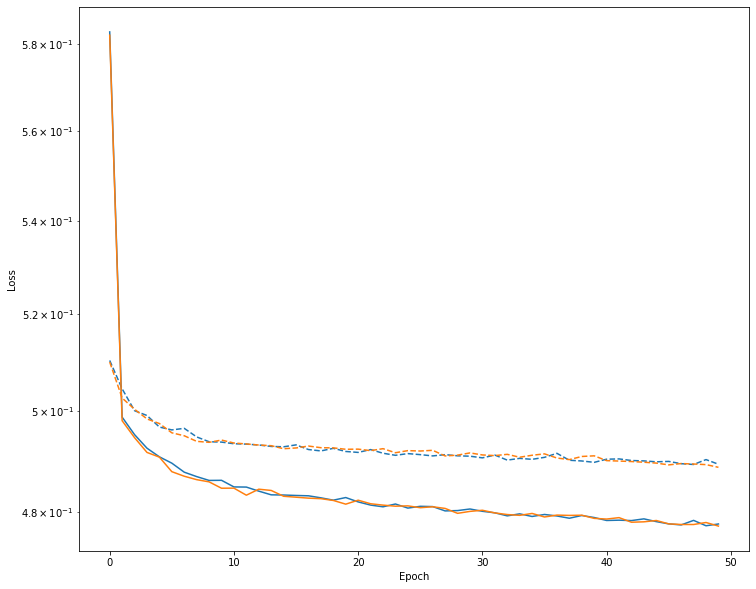

In [57]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [58]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/150
203/203 [==============================] - 6s 11ms/step - loss: 0.6428 - tp: 13678.2304 - fp: 7376.1127 - tn: 8572.1667 - fn: 2377.4706 - accuracy: 0.6868 - precision: 0.6419 - recall: 0.8602 - auc: 0.7750 - val_loss: 0.5102 - val_tp: 2117.0000 - val_fp: 749.0000 - val_tn: 2149.0000 - val_fn: 751.0000 - val_accuracy: 0.7399 - val_precision: 0.7387 - val_recall: 0.7381 - val_auc: 0.8248
Epoch 2/150
203/203 [==============================] - 1s 5ms/step - loss: 0.5017 - tp: 10212.2010 - fp: 3511.2206 - tn: 9573.7157 - fn: 2940.8431 - accuracy: 0.7538 - precision: 0.7460 - recall: 0.7731 - auc: 0.8329 - val_loss: 0.5037 - val_tp: 2223.0000 - val_fp: 833.0000 - val_tn: 2065.0000 - val_fn: 645.0000 - val_accuracy: 0.7437 - val_precision: 0.7274 - val_recall: 0.7751 - val_auc: 0.8291
Epoch 3/150
203/203 [==============================] - 1s 5ms/step - loss: 0.4967 - tp: 10286.3725 - fp: 3573.8137 - tn: 9547.4118 - fn: 2830.3824 - accuracy: 0.7561 - precision: 0.7423 - recall: 0.7

In [59]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

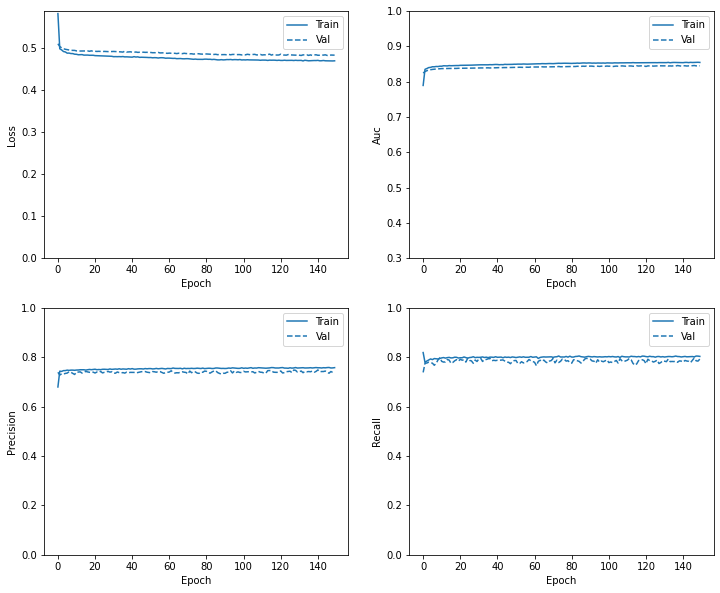

In [60]:
plot_metrics(baseline_history)

In [61]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [62]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.48405885696411133
tp :  2451.0
fp :  3767.0
tn :  10583.0
fn :  664.0
accuracy :  0.7462925910949707
precision :  0.394178181886673
recall :  0.7868378758430481
auc :  0.8477384448051453

(True Negatives):  10583
 (False Positives):  3767
(False Negatives):  664
 (True Positives):  2451
Total Transactions:  3115


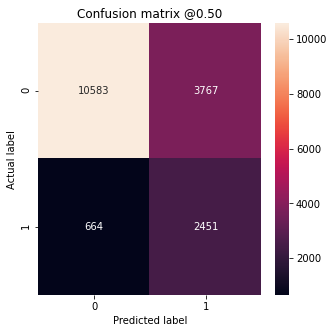

In [63]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# LSTM

In [64]:
test_predictions_baseline

array([[0.6229166 ],
       [0.93114096],
       [0.84054637],
       ...,
       [0.10747939],
       [0.15793768],
       [0.10118544]], dtype=float32)

In [65]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

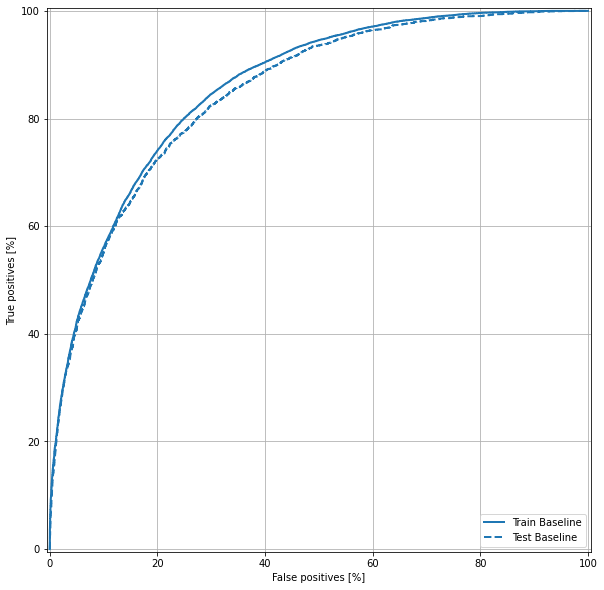

In [66]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [67]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/150
1348/1348 [==============================] - 11s 5ms/step - loss: 0.4524 - tp: 20823.4774 - fp: 9385.1119 - tn: 35981.6612 - fn: 2957.6783 - accuracy: 0.8188 - precision: 0.6484 - recall: 0.8692 - auc: 0.8868 - val_loss: 0.3633 - val_tp: 4303.0000 - val_fp: 1077.0000 - val_tn: 3743.0000 - val_fn: 461.0000 - val_accuracy: 0.8395 - val_precision: 0.7998 - val_recall: 0.9032 - val_auc: 0.9112
Epoch 2/150
1348/1348 [==============================] - 6s 4ms/step - loss: 0.3597 - tp: 19170.1312 - fp: 4567.8006 - tn: 17080.1579 - fn: 2381.8391 - accuracy: 0.8410 - precision: 0.8092 - recall: 0.8907 - auc: 0.9129 - val_loss: 0.3610 - val_tp: 4267.0000 - val_fp: 1053.0000 - val_tn: 3767.0000 - val_fn: 497.0000 - val_accuracy: 0.8383 - val_precision: 0.8021 - val_recall: 0.8957 - val_auc: 0.9120
Epoch 3/150
1348/1348 [==============================] - 5s 4ms/step - loss: 0.3643 - tp: 19131.1601 - fp: 4613.4359 - tn: 17065.3336 - fn: 2389.9993 - accuracy: 0.8381 - precision: 0.8057 - 

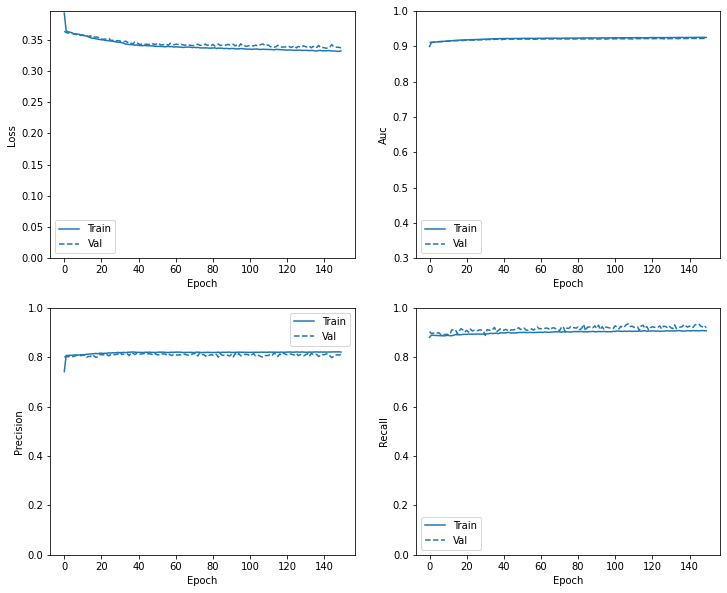

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.37810346484184265
tp :  1902.0
fp :  4757.0
tn :  19035.0
fn :  254.0
accuracy :  0.8068829774856567
precision :  0.28562846779823303
recall :  0.8821892142295837
auc :  0.9157237410545349

(True Negatives):  19035
 (False Positives):  4757
(False Negatives):  254
 (True Positives):  1902
Total Transactions:  2156


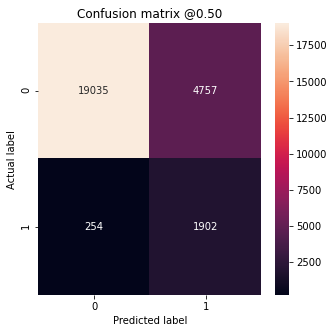

In [ ]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

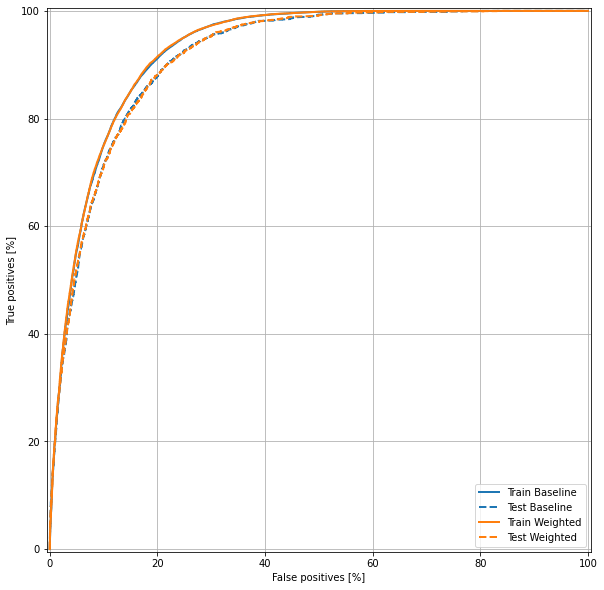

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [68]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [69]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(25930, 1, 6)

In [70]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(51860, 1, 6)

In [71]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [72]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [[-1.97593253 -0.29430344 -0.99015461  0.96968464  1.30242117 -1.07643465]]

Label:  1


In [73]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [74]:
resampled_ds

<PrefetchDataset shapes: ((None, 1, 6), (None,)), types: (tf.float64, tf.int64)>

In [75]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.48046875


In [76]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

203.0

In [77]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/150
203/203 [==============================] - 6s 12ms/step - loss: 0.6427 - tp: 13386.0980 - fp: 9646.5882 - tn: 17858.3676 - fn: 2812.6912 - accuracy: 0.7127 - precision: 0.5580 - recall: 0.8356 - auc: 0.7876 - val_loss: 0.5103 - val_tp: 2131.0000 - val_fp: 761.0000 - val_tn: 2137.0000 - val_fn: 737.0000 - val_accuracy: 0.7402 - val_precision: 0.7369 - val_recall: 0.7430 - val_auc: 0.8247
Epoch 2/150
203/203 [==============================] - 1s 7ms/step - loss: 0.4990 - tp: 10328.5147 - fp: 3531.4020 - tn: 9479.7353 - fn: 2899.0931 - accuracy: 0.7565 - precision: 0.7489 - recall: 0.7771 - auc: 0.8358 - val_loss: 0.5031 - val_tp: 2205.0000 - val_fp: 807.0000 - val_tn: 2091.0000 - val_fn: 663.0000 - val_accuracy: 0.7451 - val_precision: 0.7321 - val_recall: 0.7688 - val_auc: 0.8293
Epoch 3/150
203/203 [==============================] - 1s 7ms/step - loss: 0.4974 - tp: 10319.3284 - fp: 3580.6520 - tn: 9529.7941 - fn: 2808.9706 - accuracy: 0.7568 - precision: 0.7429 - recall: 0.

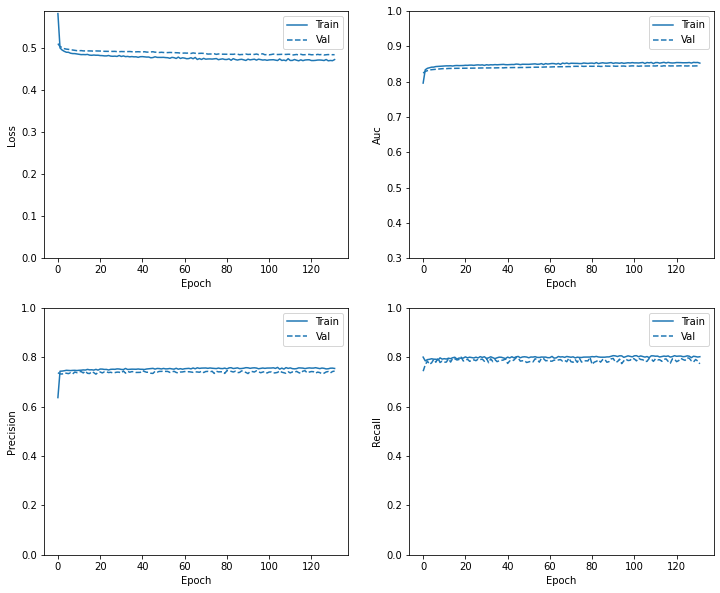

In [78]:
plot_metrics(resampled_history)

In [79]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.4815913736820221
tp :  2457.0
fp :  3751.0
tn :  10599.0
fn :  658.0
accuracy :  0.7475522756576538
precision :  0.39577963948249817
recall :  0.7887640595436096
auc :  0.8479887843132019

(True Negatives):  10599
 (False Positives):  3751
(False Negatives):  658
 (True Positives):  2457
Total Transactions:  3115


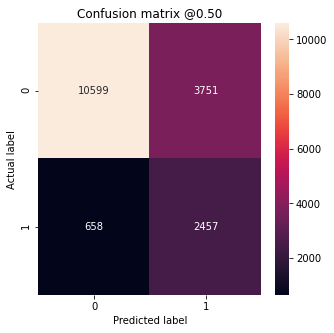

In [80]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

NameError: ignored

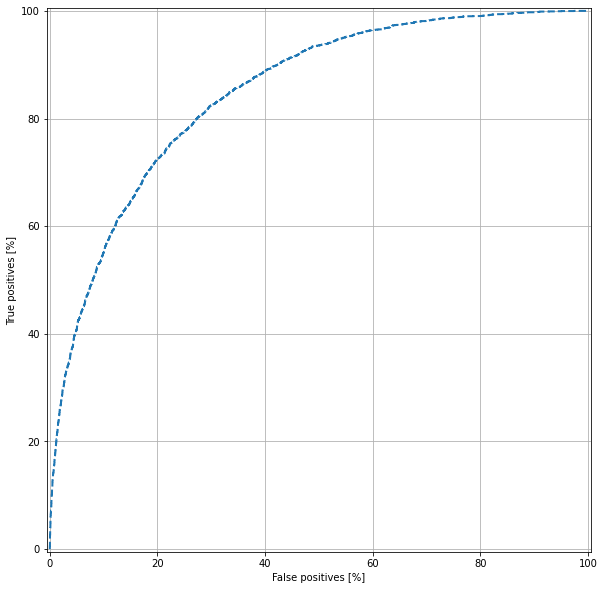

In [81]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# GRU

In [82]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               69.0  ...         5.0        1.0
9    9.0               11.0  ...        75.0        0.0
10  10.0               60.0  ...        42.0        0.0
11  11.0               89.0  ...         0.0        1.0
12  12.0               75.0  ...         0.0        1.0

[5 rows x 14 columns]

In [83]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               71.0  ...         0.0        1.0
9    9.0                0.0  ...        66.0        0.0
10  10.0               82.0  ...         6.0        1.0
11  11.0               66.0  ...         0.0        0.0
12  12.0               78.0  ...         7.0        1.0

[5 rows x 14 columns]

In [89]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [90]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (70035, 13)
shape of test set  set is (17465, 13)
shape of train labels  set is (70035,)
shape of test labels  set is (17465,)


- Remove Correlated filter

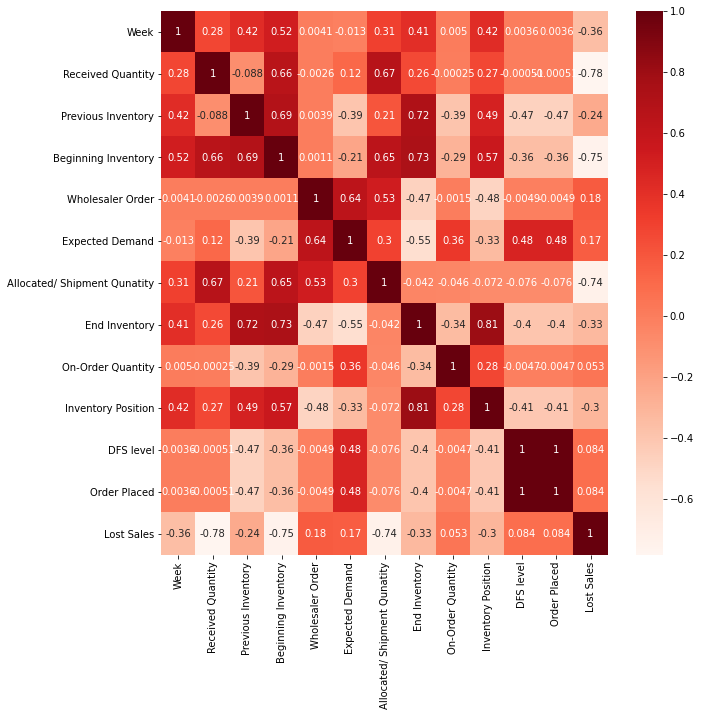

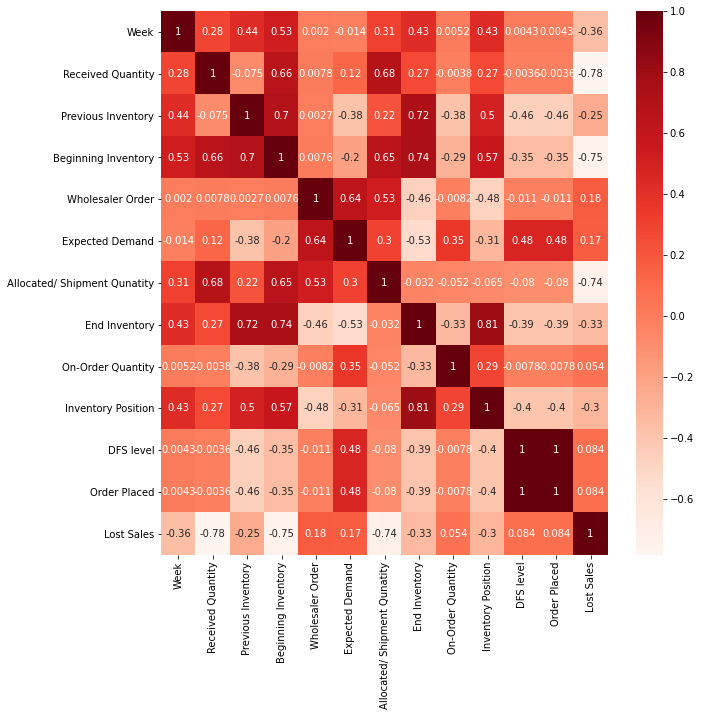

In [91]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [92]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Wholesaler Order', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [93]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","DFS Level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","DFS Level"],axis =1 )


KeyError: ignored

In [94]:
X_train.head()

Week  Received Quantity  ...  Order Placed  Lost Sales
8    8.0               69.0  ...          60.0         5.0
9    9.0               11.0  ...          94.0        75.0
10  10.0               60.0  ...          86.0        42.0
11  11.0               89.0  ...         102.0         0.0
12  12.0               75.0  ...          75.0         0.0

[5 rows x 13 columns]

In [95]:
X_train.shape

(70035, 13)

In [96]:
X_test.shape

(17465, 13)

- Correlation


In [97]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 70035
    Positive: 12379 (17.68% of total)



In [98]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, po, 100 * po / tot))

Examples:
    Total: 17465
    Positive: 3115 (17.84% of total)



In [99]:
!pip install imbalanced-learn

In [100]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [101]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [102]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 57656, 1: 12379})


Counter({0: 14350, 1: 3115})

OVER and Under Sampling pipeline

OVER SAMPLING

In [103]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.40)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 57656, 1: 23062})


UNDER SAMPLING

In [104]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 23062, 1: 23062})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [105]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
46114  1
46115  1
46116  1
46117  1
46118  1
46119  1
46120  1
46121  1
46122  1
46123  1

In [106]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0          1          2   ...         10         11         12
46094  10.691340  66.382681   0.000000  ...  74.617319  74.617319  12.617319
46095  12.019146  71.990427   0.009573  ...  79.995213  79.995213  10.000000
46096  11.039125  67.307250   0.000000  ...  80.039125  80.039125  26.346375
46097  16.962859  88.022284   9.985144  ...  73.000000  73.000000   0.000000
46098  14.241494  65.758506   8.413831  ...  86.827663  86.827663   8.413831
46099   9.000000   7.182895  10.211403  ...  75.211403  75.211403  69.000000
46100  13.327608  83.000000   5.068957  ...  74.000000  74.000000   0.931043
46101  17.155683  90.918179  21.081821  ...  74.385228  74.385228   0.000000
46102  10.288909  88.915564   0.000000  ...  91.000000  91.000000   0.000000
46103  15.648215  81.351785  11.175893  ...  77.824107  77.824107   0.000000
46104  16.000000  76.305502   0.000000  ...  91.152751  91.152751   3.388996
46105  12.946478  67.321129  17.892957  ...  62.946478  62.946478   0.000000
46106   9.000000   1.005907  12.712598  ...  85.425196  85.425196  72.137794
46107   9.000000   5.723370   0.069158  ...  88.792527  88.792527  63.276630
46108  33.127949  74.000000  27.000000  ...  74.872051  74.872051   0.000000
46109  35.932623  89.264182  13.668441  ...  70.466312  70.466312   0.000000
46110  16.164820  78.494460  19.835180  ...  79.164820  79.164820   0.000000
46111  20.470791  66.175254  26.353955  ...  86.529209  86.529209   1.529209
46112  11.000000  63.882848   2.117152  ...  71.558576  71.558576  18.207121
46113   9.000000   3.623530   0.000000  ...  88.935295  88.935295  75.720587
46114  19.446229  76.107543  18.723114  ...  83.553771  83.553771   0.000000
46115  17.000000  84.000000  19.366035  ...  64.183017  64.183017   0.000000
46116  11.536647  83.146590  15.390058  ...  72.073295  72.073295   0.000000
46117  29.691187  86.672797   4.327203  ...  75.654406  75.654406   3.000000
46118  24.748847  65.393351  16.606649  ...  86.000000  86.000000   0.000000
46119  24.758956  84.439739  14.120522  ...  81.801305  81.801305   0.000000
46120  13.310824  83.689176   0.621648  ...  73.310824  73.310824   9.067527
46121  23.461358  82.000000  12.230679  ...  69.153396  69.153396   0.000000
46122   9.142554  78.286170   0.000000  ...  90.286170  90.286170   0.000000
46123   8.065739  75.978087   6.021913  ...  77.978087  77.978087   2.956174

[30 rows x 13 columns]

In [107]:
X_train.shape

(46124, 13)

In [108]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 46124
    Positive: 23062 (50.00% of total)



In [109]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.1)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [110]:
train_df.shape

(41511, 13)

In [111]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 41511
    Positive: 20781 (50.06% of total)



In [112]:
a=pd.DataFrame(bool_train_labels)
a.shape

(41511, 1)

In [113]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (41511,)
Validation labels shape: (4613,)
Test labels shape: (17465,)
Training features shape: (41511, 13)
Validation features shape: (4613, 13)
Test features shape: (17465, 13)


In [114]:
from sklearn.decomposition import PCA

In [115]:
var_ratio={}
for n in range(2,10):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [116]:
var_ratio

{2: 0.5830313497517374,
 3: 0.7254763269292246,
 4: 0.8351220048451635,
 5: 0.9320882805173679,
 6: 0.9671124656776456,
 7: 0.9916124562138252,
 8: 0.9999490141002358,
 9: 0.9999993179702436}

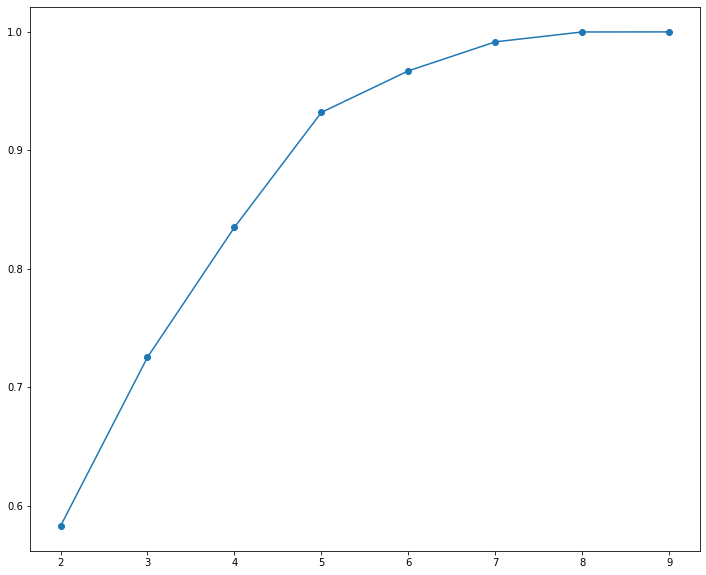

In [117]:
pd.Series(var_ratio).plot(marker="o")

In [118]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[ 0.25850308, -0.88926679, -2.2227604 , -1.80991274, -0.5330871 ,
        -0.30030189],
       [ 1.79995098, -2.12731256, -1.47739588,  0.94697641,  0.34442853,
         1.2796233 ],
       [ 1.22903264, -2.58724899,  0.67481383,  0.55587485, -0.74102666,
         1.23093326],
       ...,
       [-0.82519319,  1.41445945, -0.81396299,  1.02254514, -1.58206265,
         0.73996795],
       [ 0.94739001, -0.46459238, -1.64724497, -1.11402649, -0.81822628,
         0.50356669],
       [-0.81374168, -0.03162342, -0.95135931,  1.17936765, -0.37163894,
        -0.28732121]])

In [119]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [120]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2         3         4         5
0      0.258503 -0.889267 -2.222760 -1.809913 -0.533087 -0.300302
1      1.799951 -2.127313 -1.477396  0.946976  0.344429  1.279623
2      1.229033 -2.587249  0.674814  0.555875 -0.741027  1.230933
3     -2.051174  1.652087 -0.591947  0.295114 -1.195361  0.886489
4      6.498944  4.423065  0.036899 -0.147862  2.040685  0.238205
...         ...       ...       ...       ...       ...       ...
41506 -1.266667  0.408645 -1.149938 -1.700738  0.307009 -0.265412
41507 -1.956508 -0.402447 -2.208267  0.344923  0.423456  0.815652
41508 -0.825193  1.414459 -0.813963  1.022545 -1.582063  0.739968
41509  0.947390 -0.464592 -1.647245 -1.114026 -0.818226  0.503567
41510 -0.813742 -0.031623 -0.951359  1.179368 -0.371639 -0.287321

[41511 rows x 6 columns]

In [121]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [122]:
pos_df.shape

(20781, 6)

In [123]:
train_features = np.array(train_features).reshape((train_features.shape[0], 1, train_features.shape[1]))
test_features = np.array(test_features).reshape((test_features.shape[0], 1, test_features.shape[1]))




In [124]:
val_features = np.array(val_features).reshape((val_features.shape[0], 1, val_features.shape[1]))

In [125]:
val_features.shape

(4613, 1, 6)

In [126]:
test_features.shape

(17465, 1, 6)

In [127]:
train_features.shape

(41511, 1, 6)

In [128]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Embedding
from keras.layers import Dropout

In [129]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)

  model = keras.Sequential([
      keras.layers.GRU(
        30, activation='relu',
          input_shape=(train_features.shape[1], train_features.shape[2]),return_sequences=True),
      keras.layers.Dropout(0.2),
        keras.layers.GRU(20,activation ="tanh"),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(6,activation="relu"),
      # keras.layers.Dense(4,activation="relu"),
      # keras.layers.Dense(2,activation="sigmoid"),
      # keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [130]:
EPOCHS = 150
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [131]:
model = make_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 30)             3420      
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 30)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 20)                3120      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.predict(train_features[:10])

array([[0.52681553],
       [0.54265267],
       [0.5429213 ],
       [0.48205376],
       [0.56162226],
       [0.5307361 ],
       [0.51345074],
       [0.57370067],
       [0.5138362 ],
       [0.51796544]], dtype=float32)

In [133]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6961


In [134]:
initial_bias = np.log([pos/neg])
initial_bias

array([0.00245718])

In [135]:

model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.4748482 ],
       [0.4801875 ],
       [0.47246563],
       [0.5099152 ],
       [0.5045221 ],
       [0.49196082],
       [0.5096223 ],
       [0.47785223],
       [0.5040555 ],
       [0.5007926 ]], dtype=float32)

In [136]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7013


In [137]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [138]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [139]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [140]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [141]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

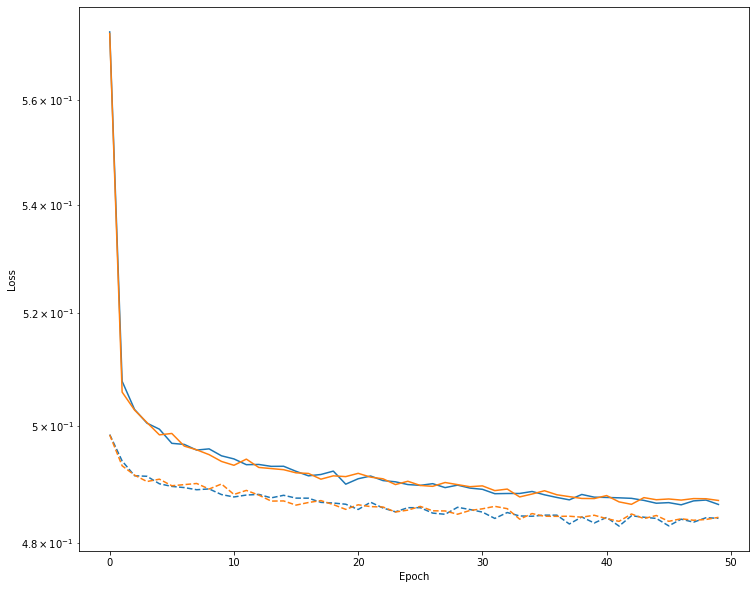

In [142]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [143]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/150
163/163 [==============================] - 7s 13ms/step - loss: 0.6292 - tp: 8889.5610 - fp: 3744.3049 - tn: 9158.5976 - fn: 3936.3293 - accuracy: 0.6937 - precision: 0.6945 - recall: 0.6878 - auc: 0.7677 - val_loss: 0.4975 - val_tp: 1722.0000 - val_fp: 582.0000 - val_tn: 1750.0000 - val_fn: 559.0000 - val_accuracy: 0.7527 - val_precision: 0.7474 - val_recall: 0.7549 - val_auc: 0.8353
Epoch 2/150
163/163 [==============================] - 1s 5ms/step - loss: 0.5044 - tp: 8079.8720 - fp: 2806.5061 - tn: 7737.1768 - fn: 2492.2378 - accuracy: 0.7513 - precision: 0.7457 - recall: 0.7645 - auc: 0.8306 - val_loss: 0.4923 - val_tp: 1765.0000 - val_fp: 614.0000 - val_tn: 1718.0000 - val_fn: 516.0000 - val_accuracy: 0.7550 - val_precision: 0.7419 - val_recall: 0.7738 - val_auc: 0.8389
Epoch 3/150
163/163 [==============================] - 1s 5ms/step - loss: 0.5034 - tp: 8206.1463 - fp: 2820.2866 - tn: 7693.3537 - fn: 2396.0061 - accuracy: 0.7541 - precision: 0.7465 - recall: 0.7732

In [144]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

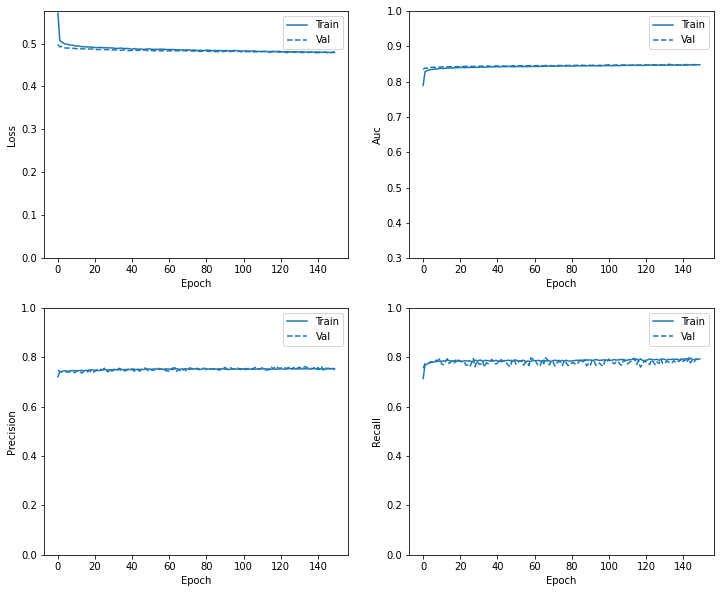

In [145]:
plot_metrics(baseline_history)

In [146]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [147]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.48376205563545227
tp :  2444.0
fp :  3694.0
tn :  10656.0
fn :  671.0
accuracy :  0.7500715851783752
precision :  0.39817529916763306
recall :  0.7845906615257263
auc :  0.8448261618614197

(True Negatives):  10656
 (False Positives):  3694
(False Negatives):  671
 (True Positives):  2444
Total Transactions:  3115


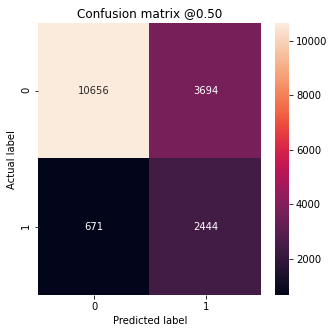

In [148]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# GRU

In [ ]:
test_predictions_baseline

array([[5.82335889e-02],
       [4.40902710e-02],
       [1.61261469e-01],
       ...,
       [4.23731446e-01],
       [4.52414155e-03],
       [1.24913295e-05]], dtype=float32)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

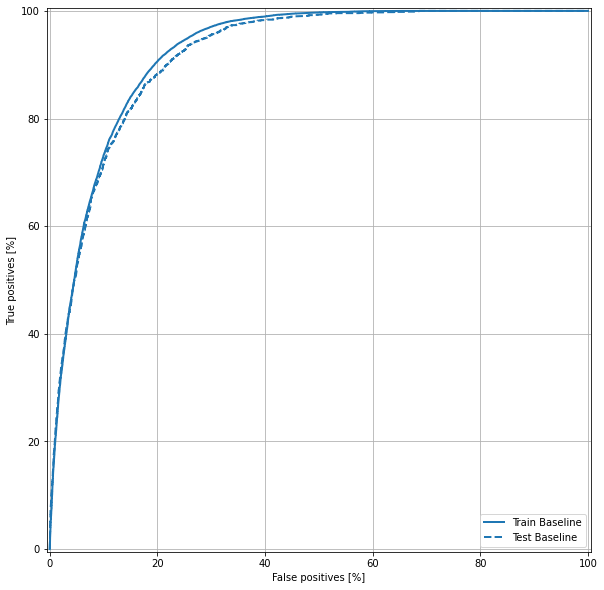

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/170
510/510 [==============================] - 5s 5ms/step - loss: 0.6061 - tp: 13864.7593 - fp: 5879.9922 - tn: 14075.8728 - fn: 6192.8356 - accuracy: 0.6963 - precision: 0.7023 - recall: 0.6850 - auc: 0.7659 - val_loss: 0.5366 - val_tp: 2778.0000 - val_fp: 1036.0000 - val_tn: 2562.0000 - val_fn: 870.0000 - val_accuracy: 0.7370 - val_precision: 0.7284 - val_recall: 0.7615 - val_auc: 0.8058
Epoch 2/170
510/510 [==============================] - 2s 3ms/step - loss: 0.5487 - tp: 12068.2975 - fp: 4777.7730 - tn: 11596.0705 - fn: 4325.3190 - accuracy: 0.7198 - precision: 0.7145 - recall: 0.7350 - auc: 0.7933 - val_loss: 0.5307 - val_tp: 2666.0000 - val_fp: 926.0000 - val_tn: 2672.0000 - val_fn: 982.0000 - val_accuracy: 0.7367 - val_precision: 0.7422 - val_recall: 0.7308 - val_auc: 0.8100
Epoch 3/170
510/510 [==============================] - 2s 3ms/step - loss: 0.5426 - tp: 12040.8924 - fp: 4730.6947 - tn: 11720.9237 - fn: 4274.9491 - accuracy: 0.7250 - precision: 0.7165 - recall: 

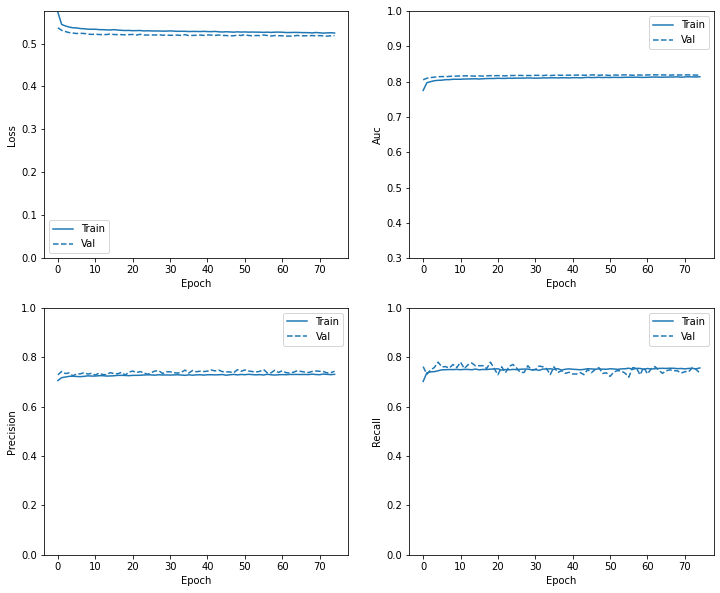

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5184459090232849
tp :  2681.0
fp :  930.0
tn :  2668.0
fn :  967.0
accuracy :  0.7382003664970398
precision :  0.7424536347389221
recall :  0.734923243522644
auc :  0.8197070360183716

(True Negatives):  2668
 (False Positives):  930
(False Negatives):  967
 (True Positives):  2681
Total Transactions:  3648


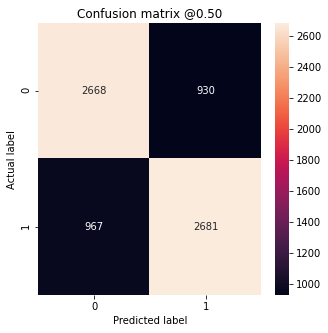

In [ ]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_weighted)

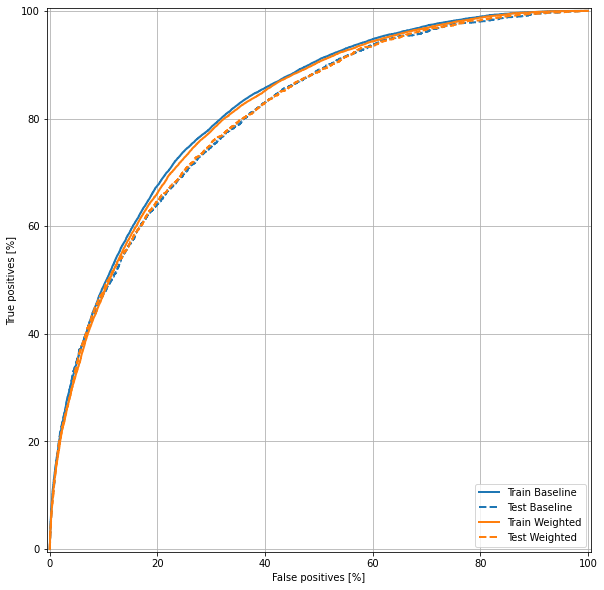

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(32628, 1, 5)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(65256, 1, 5)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [[ 1.71830398 -1.13673723 -2.17685057  0.62384352  0.08632702]]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 1, 5), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

510.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/170
510/510 [==============================] - 6s 5ms/step - loss: 0.6074 - tp: 14156.6497 - fp: 6440.0117 - tn: 13526.1859 - fn: 5890.9022 - accuracy: 0.6877 - precision: 0.6831 - recall: 0.7048 - auc: 0.7628 - val_loss: 0.5354 - val_tp: 2790.0000 - val_fp: 1051.0000 - val_tn: 2547.0000 - val_fn: 858.0000 - val_accuracy: 0.7365 - val_precision: 0.7264 - val_recall: 0.7648 - val_auc: 0.8054
Epoch 2/170
510/510 [==============================] - 2s 4ms/step - loss: 0.5484 - tp: 11934.6830 - fp: 4756.3014 - tn: 11650.7417 - fn: 4426.0235 - accuracy: 0.7175 - precision: 0.7127 - recall: 0.7268 - auc: 0.7932 - val_loss: 0.5289 - val_tp: 2829.0000 - val_fp: 1054.0000 - val_tn: 2544.0000 - val_fn: 819.0000 - val_accuracy: 0.7415 - val_precision: 0.7286 - val_recall: 0.7755 - val_auc: 0.8106
Epoch 3/170
510/510 [==============================] - 2s 4ms/step - loss: 0.5406 - tp: 12027.2779 - fp: 4643.0528 - tn: 11808.1996 - fn: 4289.2192 - accuracy: 0.7271 - precision: 0.7202 - recall:

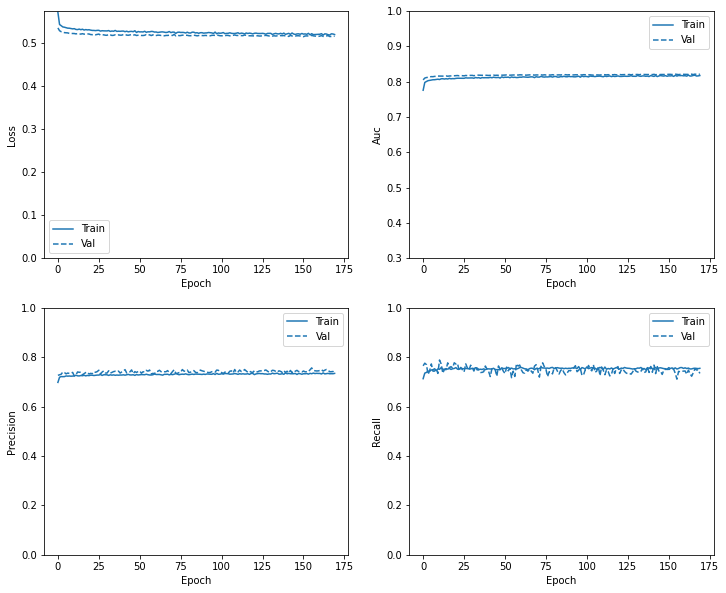

In [ ]:
plot_metrics(resampled_history)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=2*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/340
20/20 [==============================] - 5s 59ms/step - loss: 0.7008 - tp: 2889.5714 - fp: 1123.3810 - tn: 3173.1429 - fn: 1461.8095 - accuracy: 0.7026 - precision: 0.7211 - recall: 0.6663 - auc: 0.7899 - val_loss: 0.6765 - val_tp: 2654.0000 - val_fp: 1538.0000 - val_tn: 2060.0000 - val_fn: 994.0000 - val_accuracy: 0.6506 - val_precision: 0.6331 - val_recall: 0.7275 - val_auc: 0.7144
Epoch 2/340
20/20 [==============================] - 0s 8ms/step - loss: 0.6712 - tp: 530.3810 - fp: 300.8095 - tn: 375.7619 - fn: 194.9524 - accuracy: 0.6415 - precision: 0.6332 - recall: 0.7234 - auc: 0.6948 - val_loss: 0.6484 - val_tp: 2741.0000 - val_fp: 1530.0000 - val_tn: 2068.0000 - val_fn: 907.0000 - val_accuracy: 0.6637 - val_precision: 0.6418 - val_recall: 0.7514 - val_auc: 0.7430
Epoch 3/340
20/20 [==============================] - 0s 8ms/step - loss: 0.6436 - tp: 509.1905 - fp: 278.0476 - tn: 428.1429 - fn: 186.5238 - accuracy: 0.6618 - precision: 0.6349 - recall: 0.7350 - auc: 0.73

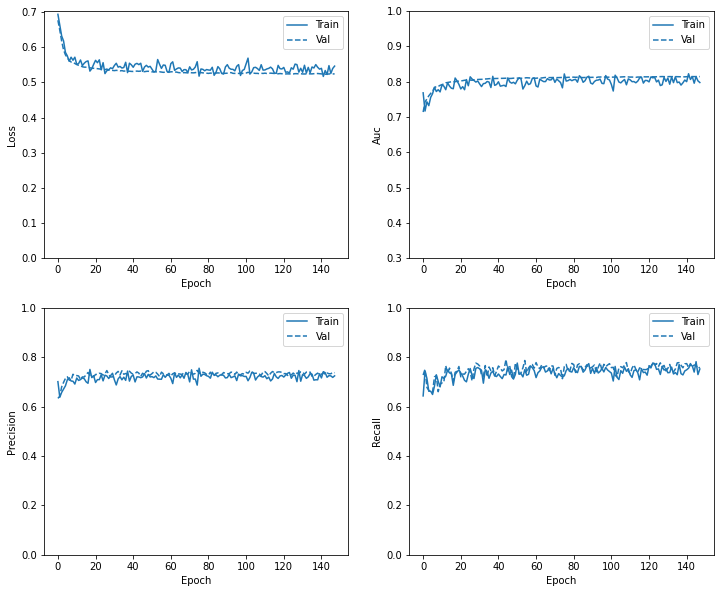

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_resampled = resampled_model.predict(val_features, batch_size=BATCH_SIZE)


loss :  0.524739682674408
tp :  2775.0
fp :  998.0
tn :  2600.0
fn :  873.0
accuracy :  0.7417885661125183
precision :  0.735489010810852
recall :  0.7606908082962036
auc :  0.8148261308670044

(True Negatives):  2600
 (False Positives):  998
(False Negatives):  873
 (True Positives):  2775
Total Transactions:  3648


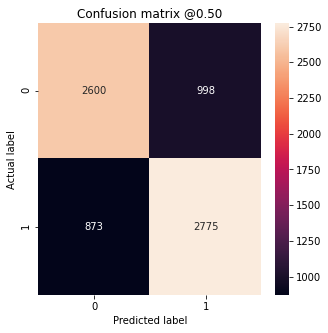

In [ ]:
resampled_results = resampled_model.evaluate(val_features, val_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_resampled)

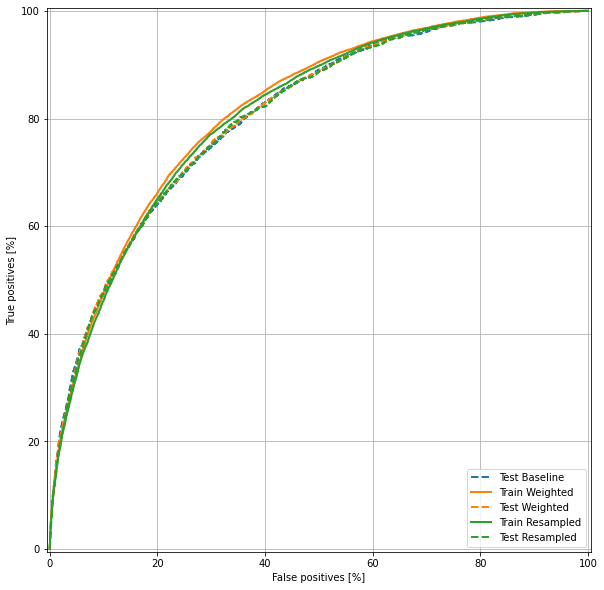

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# 1D CONV

In [149]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               69.0  ...         5.0        1.0
9    9.0               11.0  ...        75.0        0.0
10  10.0               60.0  ...        42.0        0.0
11  11.0               89.0  ...         0.0        1.0
12  12.0               75.0  ...         0.0        1.0

[5 rows x 14 columns]

In [150]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               71.0  ...         0.0        1.0
9    9.0                0.0  ...        66.0        0.0
10  10.0               82.0  ...         6.0        1.0
11  11.0               66.0  ...         0.0        0.0
12  12.0               78.0  ...         7.0        1.0

[5 rows x 14 columns]

In [155]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [156]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (70035, 13)
shape of test set  set is (17465, 13)
shape of train labels  set is (70035,)
shape of test labels  set is (17465,)


- Remove Correlated filter

In [157]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Wholesaler Order', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [158]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS Level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS Level"],axis =1 )


KeyError: ignored

In [159]:
X_train.head()

Week  Received Quantity  ...  Order Placed  Lost Sales
8    8.0               69.0  ...          60.0         5.0
9    9.0               11.0  ...          94.0        75.0
10  10.0               60.0  ...          86.0        42.0
11  11.0               89.0  ...         102.0         0.0
12  12.0               75.0  ...          75.0         0.0

[5 rows x 13 columns]

In [160]:
X_train.shape

(70035, 13)

In [161]:
X_test.shape

(17465, 13)

- Correlation


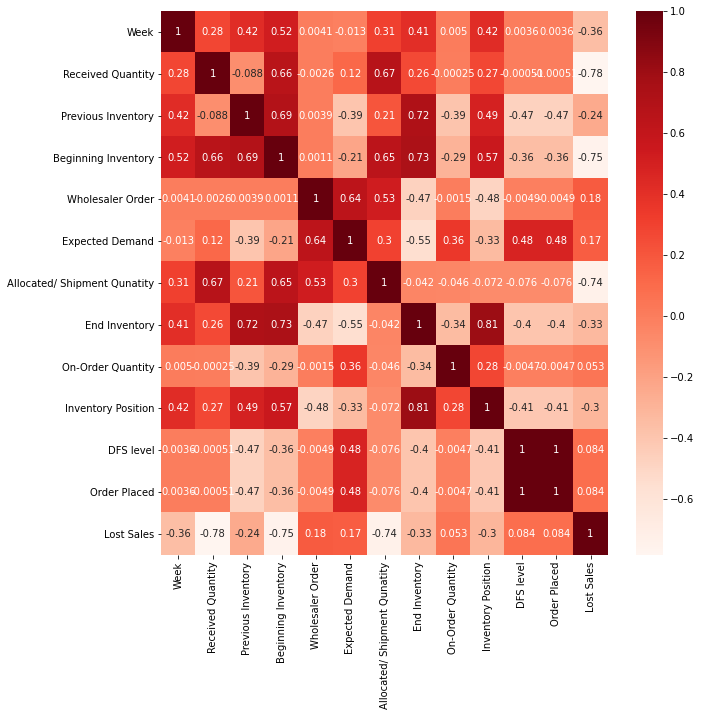

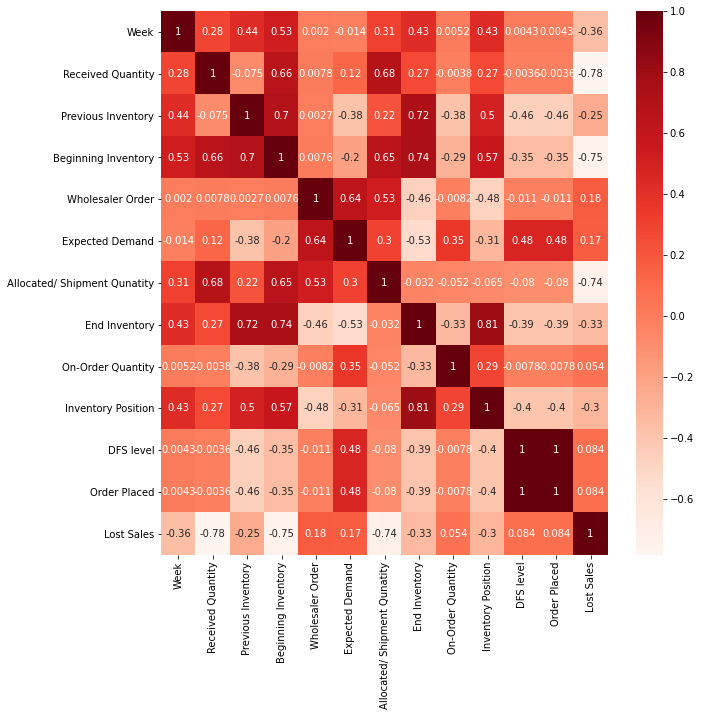

In [162]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [163]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 70035
    Positive: 12379 (17.68% of total)



In [164]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, pos, 100 * pos / total))

Examples:
    Total: 17465
    Positive: 12379 (17.68% of total)



In [165]:
!pip install imbalanced-learn

In [166]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [167]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [168]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 57656, 1: 12379})


Counter({0: 14350, 1: 3115})

OVER and Under Sampling pipeline

OVER SAMPLING

In [169]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.40)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 57656, 1: 23062})


UNDER SAMPLING

In [170]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 23062, 1: 23062})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [171]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
46114  1
46115  1
46116  1
46117  1
46118  1
46119  1
46120  1
46121  1
46122  1
46123  1

In [172]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0          1          2   ...         10         11         12
46094  16.000000  80.699958   6.240033  ...  68.939992  68.939992   2.120017
46095  15.781421  71.304645  14.781421  ...  63.086066  63.086066   0.000000
46096  16.214640  88.356081   0.000000  ...  79.429279  79.429279   0.000000
46097   8.847740  80.000000   0.000000  ...  87.152260  87.152260   9.869681
46098  33.589539  75.615692  19.205231  ...  90.794769  90.794769   0.000000
46099   8.000000  66.459080   0.000000  ...  92.081840  92.081840  20.163680
46100  35.373148  78.626852  25.843287  ...  64.096992  64.096992   0.000000
46101  10.812174  78.000000   0.000000  ...  75.624348  75.624348   0.000000
46102  15.702413  68.283735  22.716265  ...  73.000000  73.000000   5.148794
46103  20.154288  84.077144   5.922856  ...  78.000000  78.000000   0.000000
46104   8.000000  67.129702  19.435149  ...  73.435149  73.435149   0.000000
46105  24.000000  69.737497  18.262503  ...  88.245832  88.245832   0.000000
46106  12.000000  67.938372  15.312791  ...  75.687209  75.687209   0.000000
46107  14.942379  79.628253   4.628253  ...  89.628253  89.628253   0.000000
46108  19.290050  79.860033  21.000000  ...  59.284992  59.284992   0.000000
46109  28.000000  68.065664  21.901504  ...  71.098496  71.098496   0.000000
46110  12.795306  83.931769   0.000000  ...  90.068231  90.068231   0.000000
46111   9.285627  77.285627   0.000000  ...  80.642814  80.642814   4.785932
46112  27.336102  89.336102  18.000000  ...  67.991693  67.991693   0.000000
46113  10.861180  70.277641   0.000000  ...  68.277641  68.277641   9.000000
46114  18.589484  86.000000   9.821032  ...  68.178968  68.178968   0.000000
46115  12.664788  96.221596   4.113616  ...  73.221596  73.221596   0.221596
46116  14.128981  83.000000   0.564490  ...  86.000000  86.000000   0.000000
46117  12.028701  74.676234   1.352468  ...  70.704935  70.704935  21.647532
46118  32.420935  70.452561  41.484187  ...  77.547439  77.547439   0.000000
46119   9.000000  10.591198   0.000000  ...  85.591198  85.591198  80.136267
46120  34.571933  86.785967  57.678361  ...  49.535672  49.535672   0.000000
46121  22.000000  59.221730  44.202378  ...  81.151784  81.151784   0.000000
46122  11.685014  85.527521   0.000000  ...  68.897550  68.897550   0.000000
46123  14.793157  66.494297  50.402281  ...  51.701141  51.701141   0.000000

[30 rows x 13 columns]

In [173]:
X_train.shape

(46124, 13)

In [174]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 46124
    Positive: 23062 (50.00% of total)



In [175]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.25)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [176]:
train_df.shape

(34593, 13)

In [177]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 34593
    Positive: 17337 (50.12% of total)



In [178]:
a=pd.DataFrame(bool_train_labels)
a.shape

(34593, 1)

In [179]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (34593,)
Validation labels shape: (11531,)
Test labels shape: (17465,)
Training features shape: (34593, 13)
Validation features shape: (11531, 13)
Test features shape: (17465, 13)


In [180]:
from sklearn.decomposition import PCA

In [181]:
var_ratio={}
for n in range(2,10):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [182]:
var_ratio

{2: 0.5837752141022561,
 3: 0.7259666663219494,
 4: 0.8356791313348348,
 5: 0.9323735185575639,
 6: 0.9670403823245076,
 7: 0.9915895891927979,
 8: 0.9999455368533777,
 9: 0.9999999970895429}

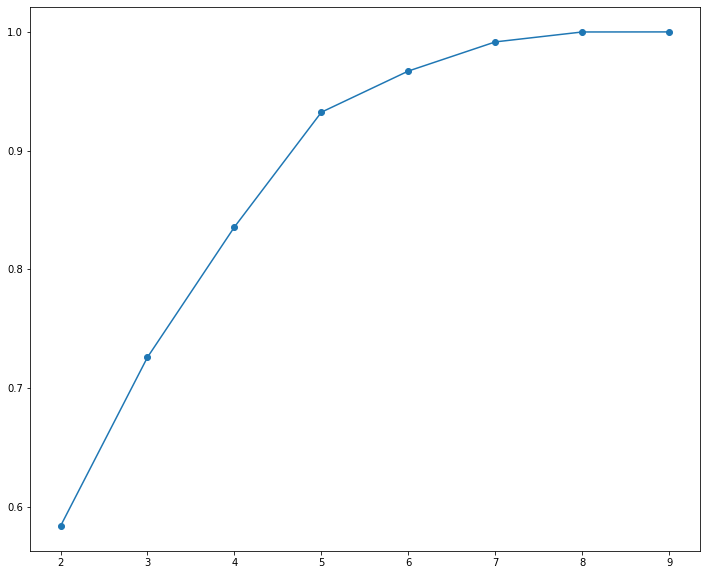

In [183]:
pd.Series(var_ratio).plot(marker="o")

In [184]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[-2.42988145,  1.53525304,  1.42339616,  0.04283207,  0.23312806,
        -0.20705208],
       [ 0.50378252,  1.78919406,  0.39731067,  0.96681848, -1.83019667,
        -0.6816576 ],
       [-3.44595601,  0.59744684, -1.76567809, -1.78506655,  2.26742578,
         0.34821107],
       ...,
       [ 0.6220649 , -0.64782827, -0.06511196,  0.862403  , -0.99238202,
        -0.28555308],
       [-0.61208775, -0.31976413, -1.06360901,  0.68609629, -0.51433306,
         0.11370538],
       [-0.57940393,  0.92092489,  0.49935205,  0.37990827,  0.40418899,
        -0.33466108]])

In [185]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [186]:
val_features

array([[-0.56324599, -0.21173344, -0.02735672, -0.33894377, -0.14668773,
        -0.24009988],
       [ 0.87235592, -0.23500487, -0.96153615, -0.09051882, -1.36378129,
        -0.49002346],
       [ 0.3075152 , -0.131959  , -2.90792523, -1.42593695, -0.69334258,
         0.40268039],
       ...,
       [ 1.34109474, -1.47857681,  1.96441118, -0.03059708, -0.70346453,
         0.36761234],
       [ 0.76588422,  0.27367556, -0.98101984,  0.11680058, -1.08821864,
        -0.89486143],
       [ 2.68752368, -0.77046633, -0.0819096 ,  0.92723611,  0.24484349,
         0.77448992]])

In [187]:
test_features

array([[ 0.97552282,  0.37021073,  1.43009122,  1.27146604, -1.11244206,
         0.77249805],
       [ 5.65202342,  5.14446164, -1.12612635,  0.82445681,  1.94175787,
         0.04348023],
       [ 1.50420311, -1.08332153, -1.50592293, -1.43026109, -1.09110709,
         0.56317689],
       ...,
       [-1.36920654, -0.43842001,  1.94178715,  0.34819283,  0.21125337,
        -0.59752435],
       [-2.26968103,  0.12473118,  0.41741423,  0.84853895,  0.98938493,
        -0.63029856],
       [-2.24835821, -0.11706347,  1.20064432, -0.4147478 ,  1.19935555,
        -0.34007022]])

In [188]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2         3         4         5
0     -2.429881  1.535253  1.423396  0.042832  0.233128 -0.207052
1      0.503783  1.789194  0.397311  0.966818 -1.830197 -0.681658
2     -3.445956  0.597447 -1.765678 -1.785067  2.267426  0.348211
3     -1.338120  1.923220 -0.339831  0.165007 -0.984600  0.425814
4      1.291016 -0.331797 -1.495180  0.513513 -0.989823  0.264409
...         ...       ...       ...       ...       ...       ...
34588  1.936768 -1.001032 -0.527174 -1.528427 -0.829207  0.233876
34589 -0.852040 -2.129196 -0.778963  1.174865  0.182258 -0.187983
34590  0.622065 -0.647828 -0.065112  0.862403 -0.992382 -0.285553
34591 -0.612088 -0.319764 -1.063609  0.686096 -0.514333  0.113705
34592 -0.579404  0.920925  0.499352  0.379908  0.404189 -0.334661

[34593 rows x 6 columns]

In [189]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [190]:
pos_df.shape

(17337, 6)

In [191]:
test_features.shape

(17465, 6)

In [192]:
train_features = np.array(train_features).reshape((train_features.shape[0], 1, train_features.shape[1]))
test_features = np.array(test_features).reshape((test_features.shape[0], 1, test_features.shape[1]))

val_features = np.array(val_features).reshape((val_features.shape[0], 1, val_features.shape[1]))

In [193]:
train_features = train_features.reshape(train_features.shape[0],train_features.shape[2],1)
test_features = test_features.reshape(test_features.shape[0],test_features.shape[2],1)
val_features = val_features.reshape(val_features.shape[0],val_features.shape[2],1)

In [194]:
import keras 
from keras.models import Model 
from keras.models import Sequential
from keras.layers import Conv1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense

In [195]:
model = Sequential()
input_shape=(train_features.shape[1], 1)
model.add(Conv1D(64, kernel_size=2,padding = "same",activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(64,kernel_size=3,padding = "same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))

model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 64)             192       
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 64)             256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 64)             12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 64)             256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)              

In [196]:
input_shape=(train_features.shape[1], 1)

In [197]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      Conv1D(64, kernel_size=2,padding = "same",activation="relu", input_shape=input_shape),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling1D(pool_size=(2)),
      keras.layers.Conv1D(64,kernel_size=3,padding = "same", activation="relu"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling1D(pool_size=(2)),
      keras.layers.Flatten(),
      keras.layers.Dense(64, activation="tanh"),
      Dropout(0.2),
      Dense(32, activation="tanh"),
      Dropout(0.2),
      Dense(16, activation="relu"),
      Dropout(0.2),

#       model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=(2)))
# model.add(Flatten())
# model.add(Dense(64, activation="tanh"))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation="tanh"))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation="relu"))

# model.add(Dropout(0.2))
# model.add(Dense(1, activation="sigmoid"))
# model.summary()
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(6,activation="relu"),
#       keras.layers.Dense(4,activation="relu"),
#       keras.layers.Dense(2,activation="sigmoid"),
#       keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=0.005),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [198]:
EPOCHS = 200
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [199]:
model = make_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 6, 64)             192       
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 64)             256       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3, 64)             12352     
_________________________________________________________________
batch_normalization_3 (Batch (None, 3, 64)             256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)              

In [200]:
model.predict(train_features[:10])

array([[0.44704515],
       [0.44070238],
       [0.3829854 ],
       [0.43408912],
       [0.41508478],
       [0.44706866],
       [0.44412702],
       [0.42812654],
       [0.45255208],
       [0.4425415 ]], dtype=float32)

In [201]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7085


In [202]:
initial_bias = np.log([pos/neg])
initial_bias

array([0.00468304])

In [203]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.454658  ],
       [0.46928865],
       [0.4474442 ],
       [0.47815567],
       [0.4793289 ],
       [0.47981066],
       [0.4669391 ],
       [0.48296827],
       [0.48679984],
       [0.40688455]], dtype=float32)

In [204]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6864


In [205]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [206]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [207]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [208]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [209]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

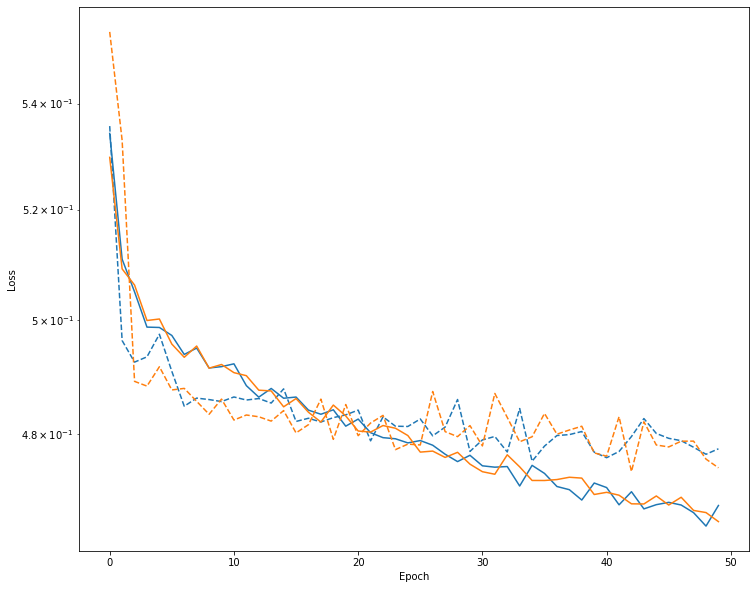

In [210]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [211]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/200
136/136 [==============================] - 5s 20ms/step - loss: 0.5526 - tp: 11273.8321 - fp: 4128.4015 - tn: 10519.1898 - fn: 3268.4526 - accuracy: 0.7475 - precision: 0.7331 - recall: 0.7743 - auc: 0.8258 - val_loss: 0.5448 - val_tp: 3544.0000 - val_fp: 973.0000 - val_tn: 4833.0000 - val_fn: 2181.0000 - val_accuracy: 0.7265 - val_precision: 0.7846 - val_recall: 0.6190 - val_auc: 0.8271
Epoch 2/200
136/136 [==============================] - 2s 13ms/step - loss: 0.5127 - tp: 6923.6131 - fp: 2498.4015 - tn: 6310.8832 - fn: 1925.9781 - accuracy: 0.7493 - precision: 0.7342 - recall: 0.7837 - auc: 0.8264 - val_loss: 0.5045 - val_tp: 4101.0000 - val_fp: 1212.0000 - val_tn: 4594.0000 - val_fn: 1624.0000 - val_accuracy: 0.7541 - val_precision: 0.7719 - val_recall: 0.7163 - val_auc: 0.8396
Epoch 3/200
136/136 [==============================] - 2s 13ms/step - loss: 0.5014 - tp: 6880.5474 - fp: 2355.4745 - tn: 6417.6423 - fn: 2005.2117 - accuracy: 0.7537 - precision: 0.7481 - recall:

In [212]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

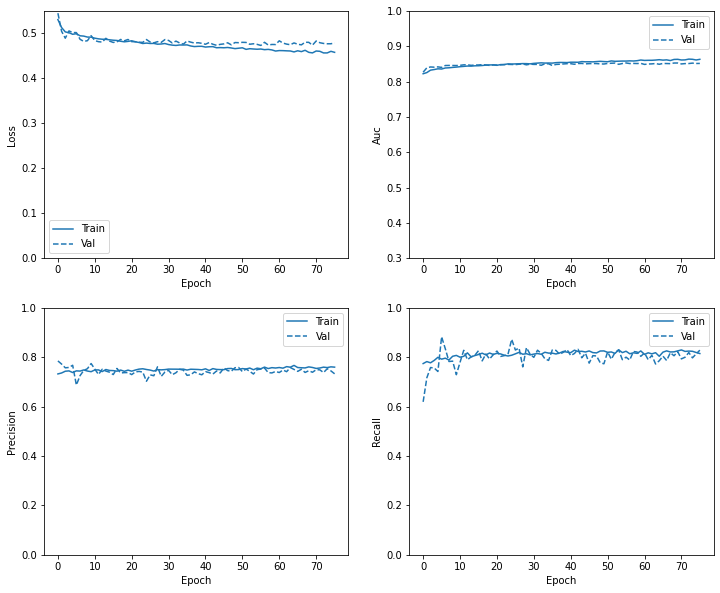

In [213]:
plot_metrics(baseline_history)

In [214]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [215]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.4863167703151703
tp :  2429.0
fp :  3783.0
tn :  10567.0
fn :  686.0
accuracy :  0.7441167831420898
precision :  0.3910173773765564
recall :  0.7797752618789673
auc :  0.8355347514152527

(True Negatives):  10567
 (False Positives):  3783
(False Negatives):  686
 (True Positives):  2429
Total Transactions:  3115


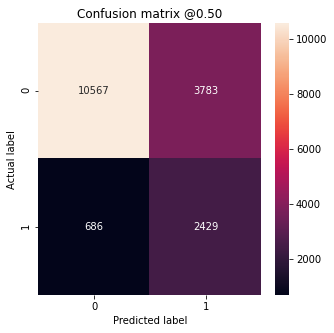

In [216]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# CONV 1D

In [217]:
test_predictions_baseline

array([[0.87189287],
       [0.91715544],
       [0.82633066],
       ...,
       [0.05500022],
       [0.10280079],
       [0.00940582]], dtype=float32)

In [218]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

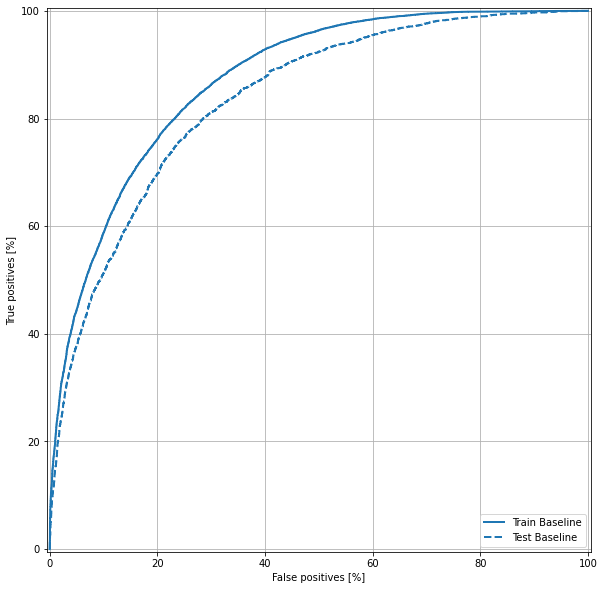

In [219]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/300
531/531 [==============================] - 8s 10ms/step - loss: 0.6911 - tp: 19345.9962 - fp: 10184.0883 - tn: 18241.9981 - fn: 8981.5113 - accuracy: 0.6669 - precision: 0.6583 - recall: 0.6902 - auc: 0.7391 - val_loss: 0.5689 - val_tp: 8803.0000 - val_fp: 4349.0000 - val_tn: 7070.0000 - val_fn: 2420.0000 - val_accuracy: 0.7010 - val_precision: 0.6693 - val_recall: 0.7844 - val_auc: 0.7772
Epoch 2/300
531/531 [==============================] - 4s 8ms/step - loss: 0.5930 - tp: 12254.1692 - fp: 5807.2820 - tn: 11185.0019 - fn: 4865.1410 - accuracy: 0.6857 - precision: 0.6764 - recall: 0.7155 - auc: 0.7521 - val_loss: 0.5475 - val_tp: 8549.0000 - val_fp: 3578.0000 - val_tn: 7841.0000 - val_fn: 2674.0000 - val_accuracy: 0.7239 - val_precision: 0.7050 - val_recall: 0.7617 - val_auc: 0.7963
Epoch 3/300
531/531 [==============================] - 4s 8ms/step - loss: 0.5774 - tp: 12434.4530 - fp: 5574.5883 - tn: 11464.8853 - fn: 4637.6673 - accuracy: 0.6994 - precision: 0.6898 - rec

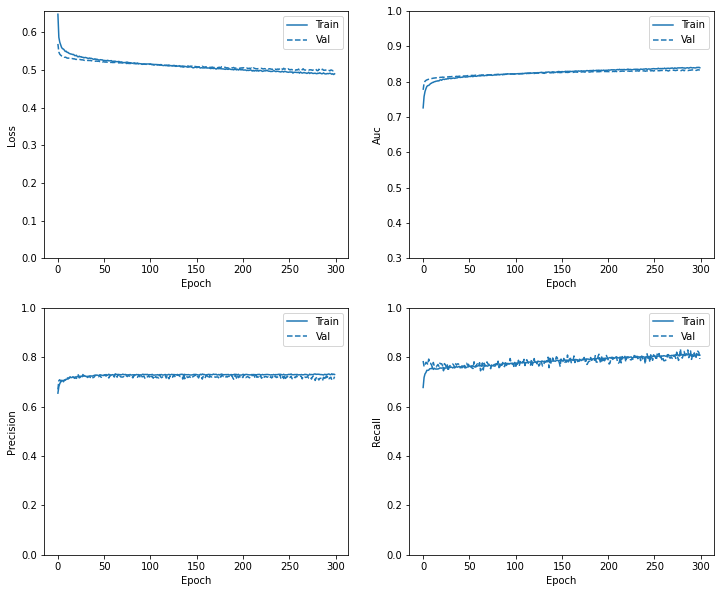

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.4981033205986023
tp :  8896.0
fp :  3444.0
tn :  7975.0
fn :  2327.0
accuracy :  0.7451196908950806
precision :  0.7209076285362244
recall :  0.7926579117774963
auc :  0.8337280750274658

(True Negatives):  7975
 (False Positives):  3444
(False Negatives):  2327
 (True Positives):  8896
Total Transactions:  11223


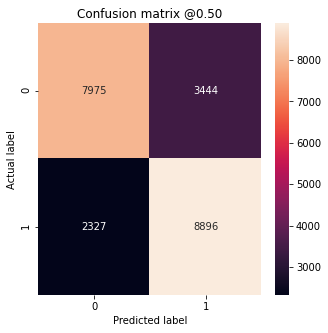

In [ ]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_weighted)

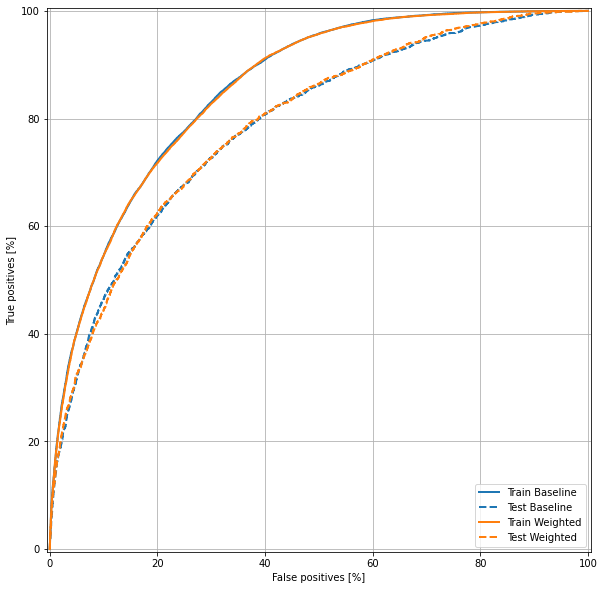

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(33864, 6, 1)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(67728, 6, 1)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [[-1.41463932]
 [-1.03407157]
 [-0.09692102]
 [ 0.93895215]
 [-0.24508446]
 [ 0.11068057]]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 6, 1), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5546875


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

530.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/300
530/530 [==============================] - 8s 11ms/step - loss: 0.6947 - tp: 11682.1356 - fp: 10759.2222 - tn: 21390.7797 - fn: 7680.6215 - accuracy: 0.6443 - precision: 0.4883 - recall: 0.5927 - auc: 0.6998 - val_loss: 0.5705 - val_tp: 8869.0000 - val_fp: 4500.0000 - val_tn: 6919.0000 - val_fn: 2354.0000 - val_accuracy: 0.6973 - val_precision: 0.6634 - val_recall: 0.7903 - val_auc: 0.7745
Epoch 2/300
530/530 [==============================] - 5s 9ms/step - loss: 0.5924 - tp: 12275.5367 - fp: 5872.9115 - tn: 11091.1488 - fn: 4808.1620 - accuracy: 0.6860 - precision: 0.6778 - recall: 0.7194 - auc: 0.7520 - val_loss: 0.5478 - val_tp: 8535.0000 - val_fp: 3609.0000 - val_tn: 7810.0000 - val_fn: 2688.0000 - val_accuracy: 0.7219 - val_precision: 0.7028 - val_recall: 0.7605 - val_auc: 0.7955
Epoch 3/300
530/530 [==============================] - 4s 8ms/step - loss: 0.5757 - tp: 12430.2863 - fp: 5627.9831 - tn: 11375.9416 - fn: 4613.5480 - accuracy: 0.6988 - precision: 0.6896 - rec

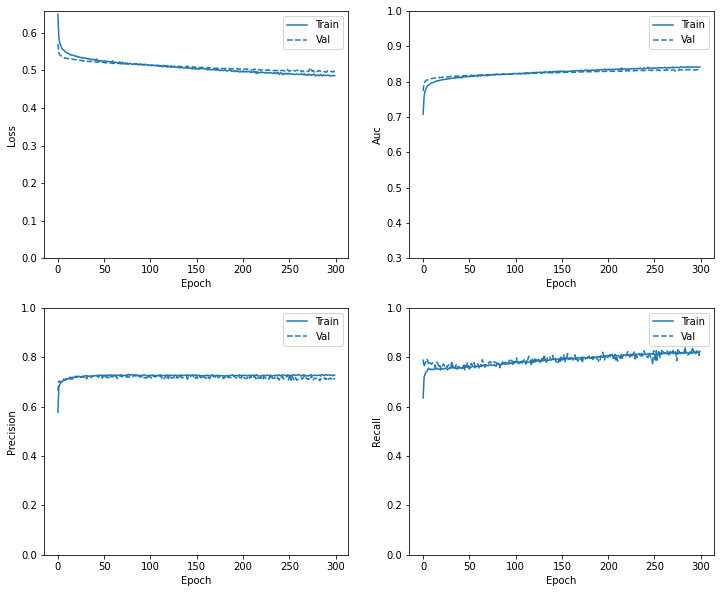

In [ ]:
plot_metrics(resampled_history)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/600
20/20 [==============================] - 4s 79ms/step - loss: 0.8108 - tp: 9618.0476 - fp: 4133.4286 - tn: 7994.5238 - fn: 2297.9048 - accuracy: 0.7328 - precision: 0.6995 - recall: 0.8076 - auc: 0.8206 - val_loss: 0.6972 - val_tp: 7965.0000 - val_fp: 8889.0000 - val_tn: 2530.0000 - val_fn: 3258.0000 - val_accuracy: 0.4635 - val_precision: 0.4726 - val_recall: 0.7097 - val_auc: 0.4552
Epoch 2/600
20/20 [==============================] - 1s 32ms/step - loss: 0.7430 - tp: 309.6667 - fp: 288.4762 - tn: 412.7619 - fn: 391.0000 - accuracy: 0.5152 - precision: 0.5273 - recall: 0.4430 - auc: 0.5329 - val_loss: 0.6902 - val_tp: 10341.0000 - val_fp: 10387.0000 - val_tn: 1032.0000 - val_fn: 882.0000 - val_accuracy: 0.5023 - val_precision: 0.4989 - val_recall: 0.9214 - val_auc: 0.5821
Epoch 3/600
20/20 [==============================] - 1s 33ms/step - loss: 0.7482 - tp: 355.6190 - fp: 276.6190 - tn: 386.8095 - fn: 382.8571 - accuracy: 0.5209 - precision: 0.5680 - recall: 0.4702 - auc:

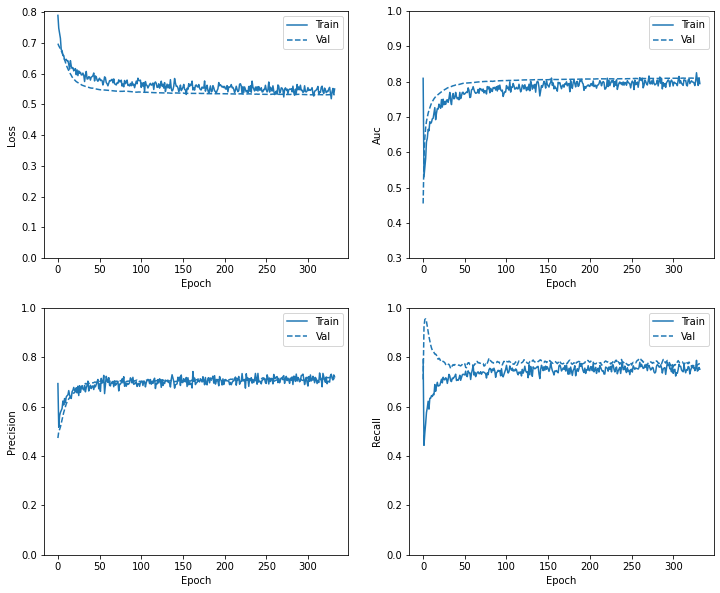

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_resampled = resampled_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5311693549156189
tp :  8702.0
fp :  3499.0
tn :  7920.0
fn :  2521.0
accuracy :  0.7341224551200867
precision :  0.7132202386856079
recall :  0.7753720283508301
auc :  0.810551643371582

(True Negatives):  7920
 (False Positives):  3499
(False Negatives):  2521
 (True Positives):  8702
Total Transactions:  11223


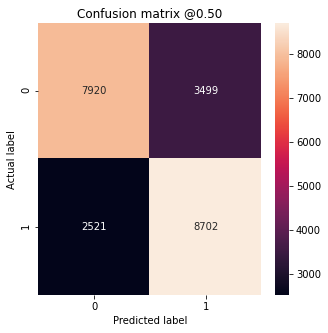

In [ ]:
resampled_results = resampled_model.evaluate(val_features, val_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_resampled)

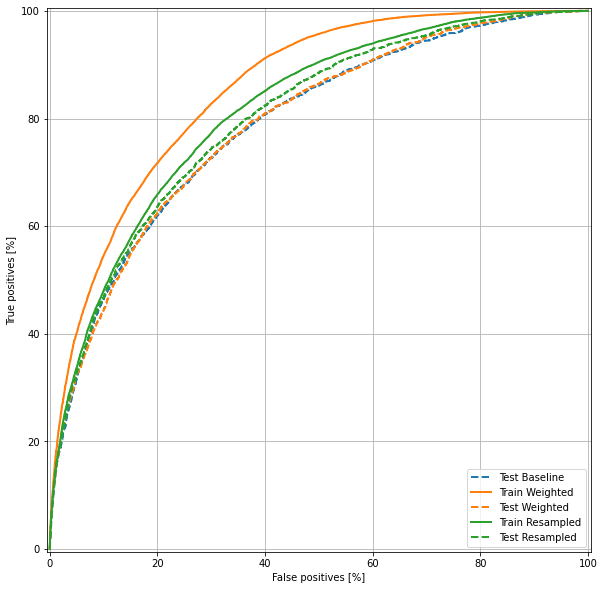

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# DNN


In [220]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               69.0  ...         5.0        1.0
9    9.0               11.0  ...        75.0        0.0
10  10.0               60.0  ...        42.0        0.0
11  11.0               89.0  ...         0.0        1.0
12  12.0               75.0  ...         0.0        1.0

[5 rows x 14 columns]

In [221]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               71.0  ...         0.0        1.0
9    9.0                0.0  ...        66.0        0.0
10  10.0               82.0  ...         6.0        1.0
11  11.0               66.0  ...         0.0        0.0
12  12.0               78.0  ...         7.0        1.0

[5 rows x 14 columns]

In [222]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [223]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (70035, 13)
shape of test set  set is (17465, 13)
shape of train labels  set is (70035,)
shape of test labels  set is (17465,)


- Remove Correlated filter

In [224]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Wholesaler Order', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [226]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis =1 )


In [227]:
X_train.head()

Week  Received Quantity  ...  Inventory Position  Lost Sales
8    8.0               69.0  ...                75.0         5.0
9    9.0               11.0  ...                60.0        75.0
10  10.0               60.0  ...                94.0        42.0
11  11.0               89.0  ...               100.0         0.0
12  12.0               75.0  ...               106.0         0.0

[5 rows x 9 columns]

In [228]:
X_train.shape

(70035, 9)

In [229]:
X_test.shape

(17465, 9)

- Correlation


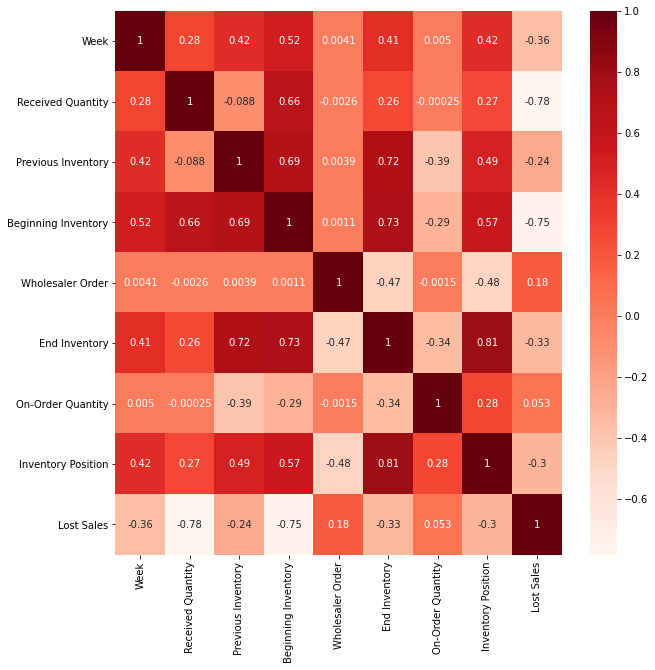

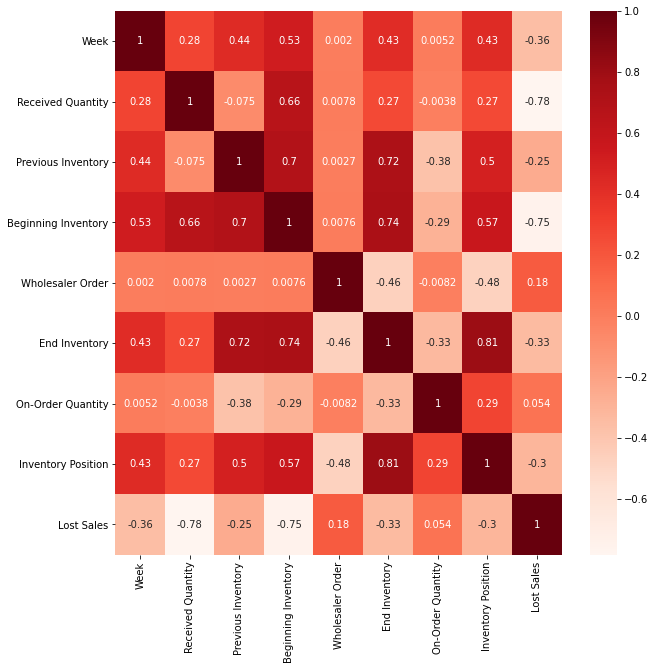

In [230]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [231]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 70035
    Positive: 12379 (17.68% of total)



In [232]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, pos, 100 * pos / total))

Examples:
    Total: 17465
    Positive: 12379 (17.68% of total)



In [233]:
!pip install imbalanced-learn

In [234]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [235]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [236]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 57656, 1: 12379})


Counter({0: 14350, 1: 3115})

OVER and Under Sampling pipeline

OVER SAMPLING

In [237]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.75)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 57656, 1: 43242})


UNDER SAMPLING

In [238]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 43242, 1: 43242})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [239]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
86474  1
86475  1
86476  1
86477  1
86478  1
86479  1
86480  1
86481  1
86482  1
86483  1

In [240]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0          1          2  ...          6           7          8
86454   8.000000  72.549742   7.816753  ...  92.816753   92.816753   7.000000
86455  24.606547  74.180359  27.213094  ...  80.786906   98.606547   0.000000
86456  25.129255  85.000000  14.693883  ...  78.435372   93.129255   0.000000
86457  33.881984  84.881984  24.236033  ...  80.440992   91.000000   0.000000
86458  21.435144  93.000000   0.000000  ...  91.376571   98.376571   0.000000
86459  17.000000  94.743952   0.000000  ...  86.743952   98.231857   0.000000
86460  12.000000  79.674170  16.651660  ...  76.022510   86.348340   0.000000
86461  10.000000  67.000000   0.000000  ...  80.000000   80.000000  17.601154
86462  11.065086  83.065086   0.000000  ...  92.934914   92.934914  14.869829
86463  11.000000  82.432627   0.000000  ...  68.000000   77.477542   0.000000
86464  15.270861  90.182285   6.817715  ...  77.270861   88.635431   0.000000
86465  25.388454  70.895304  13.104696  ...  90.537182  108.358121   0.000000
86466  25.000000  85.623722   0.000000  ...  87.811861   87.811861   0.376278
86467  29.772703  75.056824  22.886351  ...  75.000000   78.943176   0.000000
86468  10.000000  76.170430   0.000000  ...  78.000000   78.000000   5.829570
86469  33.836260  80.945420  19.890840  ...  78.000000   82.054580   0.000000
86470  20.003129  76.331247  31.000000  ...  80.665624  103.996871   0.000000
86471  23.302254  70.616291  45.767418  ...  82.081455  101.000000   0.000000
86472  13.000000  67.000000   7.517171  ...  74.241415   74.241415   3.758585
86473  35.606069  60.404046  48.595954  ...  71.000000   97.595954   0.000000
86474  34.847746  87.593179  11.406821  ...  83.406821   95.406821   0.000000
86475   8.734527  70.020631   7.000000  ...  62.510316   62.510316   4.979369
86476  23.097817  91.619563  17.902183  ...  89.000000  102.619563   0.000000
86477  14.649407  63.870119  22.000000  ...  87.129881   87.129881   1.519525
86478  24.000000  73.812501  47.000000  ...  77.187499  109.953125   0.000000
86479  28.101083  71.101083  56.779783  ...  65.440433   93.660650   0.000000
86480  13.981067  70.962134  21.056798  ...  69.018933   72.075731   0.000000
86481  11.993964  87.012073   0.000000  ...  69.000000   80.000000   0.000000
86482  36.600171  64.600171  37.599886  ...  78.000285   91.000285   0.000000
86483  24.086327  87.948204  22.034531  ...  69.017265  102.965469   0.000000

[30 rows x 9 columns]

In [241]:
X_train.shape

(86484, 9)

In [242]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 86484
    Positive: 43242 (50.00% of total)



In [243]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.1)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [244]:
train_df.shape

(77835, 9)

In [245]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 77835
    Positive: 38825 (49.88% of total)



In [246]:
a=pd.DataFrame(bool_train_labels)
a.shape

(77835, 1)

In [247]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (77835,)
Validation labels shape: (8649,)
Test labels shape: (17465,)
Training features shape: (77835, 9)
Validation features shape: (8649, 9)
Test features shape: (17465, 9)


In [248]:
from sklearn.decomposition import PCA

In [249]:
var_ratio={}
for n in range(2,9):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [250]:
var_ratio

{2: 0.6317878293292614,
 3: 0.7954145877804816,
 4: 0.9127349132764984,
 5: 0.9672327171858099,
 6: 0.9999504054967955,
 7: 0.9999983293686999,
 8: 0.9999996689141692}

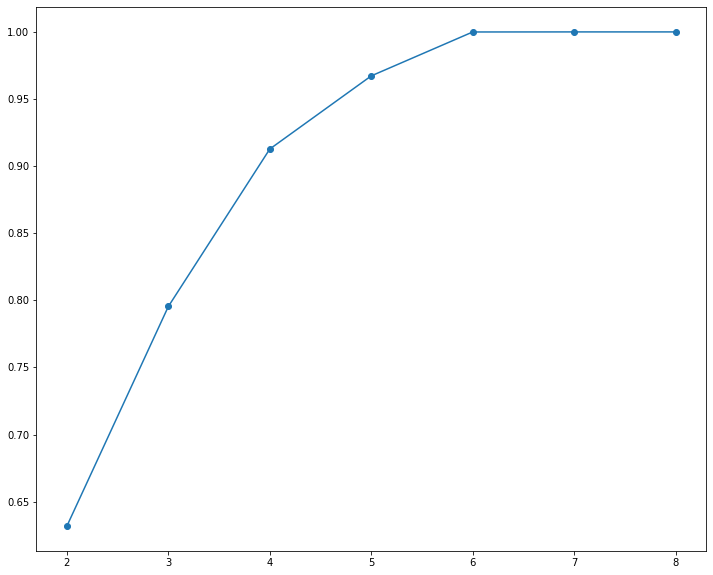

In [251]:
pd.Series(var_ratio).plot(marker="o")

In [252]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[-1.34952695, -0.64398786, -0.99044193,  0.9671493 ,  0.92651581,
         0.44951976],
       [ 0.74625951,  0.36481379, -1.10080717,  0.35933137,  0.34513601,
         0.85694158],
       [ 0.98382972, -1.11622365,  0.66154542,  0.33463053, -0.42023623,
        -0.83505042],
       ...,
       [-1.4552951 , -2.01965491, -0.58932682, -0.39939234,  0.66258196,
        -0.61538098],
       [ 2.07192921,  0.95880805,  0.98891647, -0.62235518, -1.11686944,
        -0.52375609],
       [-1.42948524, -0.34747668,  0.81414826,  0.1908319 , -0.68159253,
         0.14033635]])

In [253]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [254]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2         3         4         5
0     -1.349527 -0.643988 -0.990442  0.967149  0.926516  0.449520
1      0.746260  0.364814 -1.100807  0.359331  0.345136  0.856942
2      0.983830 -1.116224  0.661545  0.334631 -0.420236 -0.835050
3      0.288073 -0.776758 -0.680709  0.388357  0.409924  0.235118
4      2.755762 -0.477165 -1.368092  1.684084  0.284325 -0.439985
...         ...       ...       ...       ...       ...       ...
77830  2.590143  1.507965 -1.212928 -0.923321  0.517600 -0.009944
77831 -1.828135 -0.963318 -0.317818  1.477789 -0.419069 -1.069216
77832 -1.455295 -2.019655 -0.589327 -0.399392  0.662582 -0.615381
77833  2.071929  0.958808  0.988916 -0.622355 -1.116869 -0.523756
77834 -1.429485 -0.347477  0.814148  0.190832 -0.681593  0.140336

[77835 rows x 6 columns]

In [255]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [256]:
pos_df.shape

(38825, 6)

In [257]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
        11, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(6,activation="relu"),
      keras.layers.Dense(4,activation="tanh"),
      keras.layers.Dense(2,activation="sigmoid"),
      keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=0.0005),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [258]:
EPOCHS = 200
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [259]:
model = make_model()
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 11)                77        
_________________________________________________________________
dropout_34 (Dropout)         (None, 11)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 8)                 96        
_________________________________________________________________
dropout_35 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_43 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_36 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_44 (Dense)             (None, 8)               

In [260]:
model.predict(train_features[:10])

array([[0.50023377],
       [0.50328004],
       [0.4085964 ],
       [0.42597437],
       [0.5030709 ],
       [0.3931029 ],
       [0.5040111 ],
       [0.41378063],
       [0.5138519 ],
       [0.49207306]], dtype=float32)

In [261]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7184


In [262]:
initial_bias = np.log([pos/neg])
initial_bias

array([-0.00475365])

In [263]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.48618004],
       [0.4919411 ],
       [0.48572776],
       [0.48749813],
       [0.4911787 ],
       [0.48570335],
       [0.49407646],
       [0.48911747],
       [0.492982  ],
       [0.49053833]], dtype=float32)

In [264]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6935


In [265]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [266]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [267]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [268]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [269]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

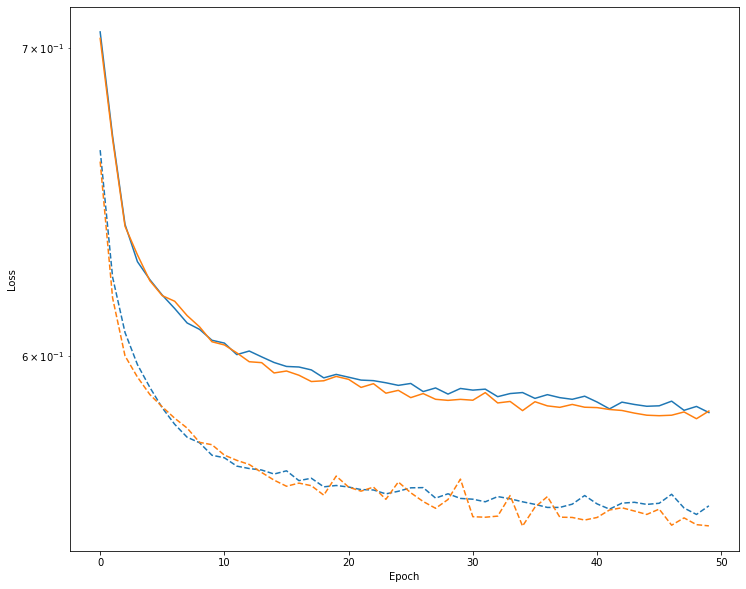

In [270]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [271]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(test_features, test_labels))

Epoch 1/200
305/305 [==============================] - 5s 6ms/step - loss: 0.7111 - tp: 10903.3824 - fp: 8100.8039 - tn: 15835.3660 - fn: 13103.0098 - accuracy: 0.5703 - precision: 0.5905 - recall: 0.4649 - auc: 0.6054 - val_loss: 0.6867 - val_tp: 2172.0000 - val_fp: 4669.0000 - val_tn: 9681.0000 - val_fn: 943.0000 - val_accuracy: 0.6787 - val_precision: 0.3175 - val_recall: 0.6973 - val_auc: 0.7346
Epoch 2/200
305/305 [==============================] - 1s 3ms/step - loss: 0.6789 - tp: 10399.3464 - fp: 6821.7222 - tn: 12883.0425 - fn: 9189.4510 - accuracy: 0.5891 - precision: 0.6004 - recall: 0.5267 - auc: 0.6033 - val_loss: 0.6467 - val_tp: 2258.0000 - val_fp: 4543.0000 - val_tn: 9807.0000 - val_fn: 857.0000 - val_accuracy: 0.6908 - val_precision: 0.3320 - val_recall: 0.7249 - val_auc: 0.7489
Epoch 3/200
305/305 [==============================] - 1s 3ms/step - loss: 0.6455 - tp: 11747.3301 - fp: 7074.2451 - tn: 12592.3039 - fn: 7879.6830 - accuracy: 0.6181 - precision: 0.6238 - recall

In [272]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

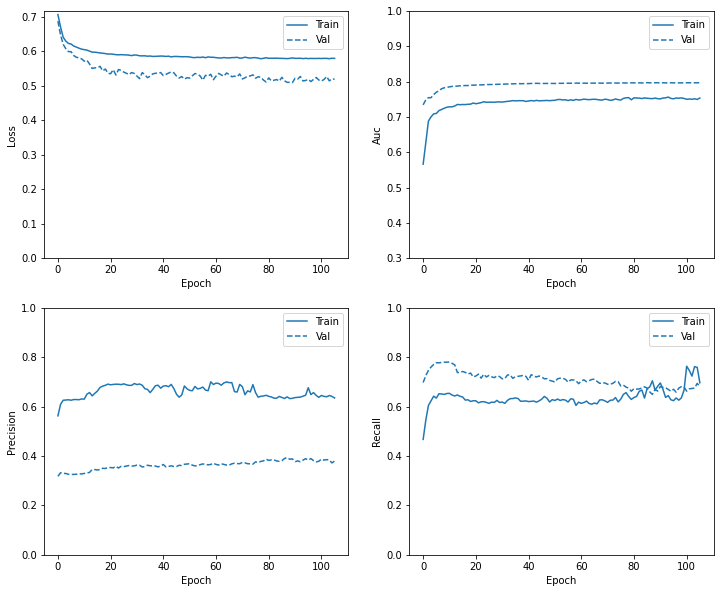

In [273]:
plot_metrics(baseline_history)

In [274]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [275]:
def plot_cm(labels, predictions, p=0.46):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.5238738059997559
tp :  2101.0
fp :  3416.0
tn :  10934.0
fn :  1014.0
accuracy :  0.7463498711585999
precision :  0.38082289695739746
recall :  0.6744783520698547
auc :  0.7976371049880981

(True Negatives):  9946
 (False Positives):  4404
(False Negatives):  778
 (True Positives):  2337
Total Transactions:  3115


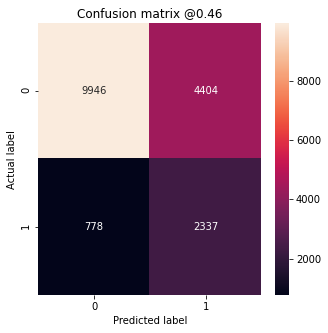

In [276]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# DNN

In [277]:
test_predictions_baseline

array([[0.74474096],
       [0.78684354],
       [0.76374394],
       ...,
       [0.12842536],
       [0.18767616],
       [0.17801657]], dtype=float32)

In [278]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

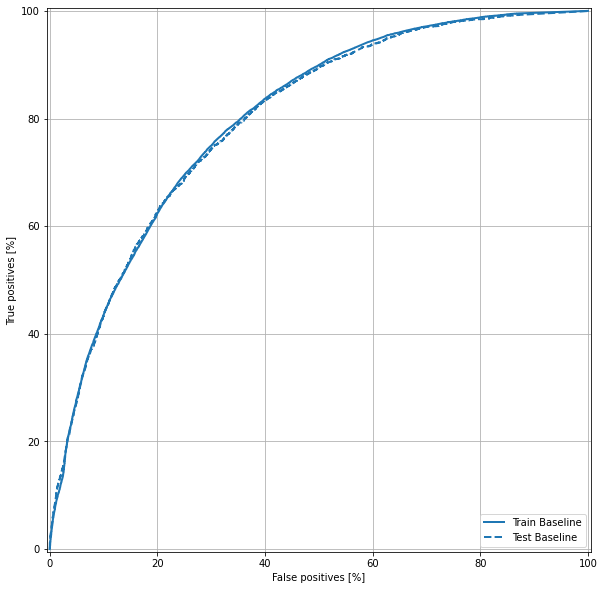

In [279]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [280]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/200
298/298 [==============================] - 5s 6ms/step - loss: 0.6969 - tp: 16793.1171 - fp: 14113.7324 - tn: 9344.4181 - fn: 6599.4515 - accuracy: 0.5677 - precision: 0.5539 - recall: 0.7235 - auc: 0.6206 - val_loss: 0.6619 - val_tp: 2890.0000 - val_fp: 1327.0000 - val_tn: 2913.0000 - val_fn: 1323.0000 - val_accuracy: 0.6865 - val_precision: 0.6853 - val_recall: 0.6860 - val_auc: 0.7370
Epoch 2/200
298/298 [==============================] - 1s 3ms/step - loss: 0.6704 - tp: 10991.2609 - fp: 7119.2876 - tn: 12035.2809 - fn: 8251.8896 - accuracy: 0.5972 - precision: 0.6053 - recall: 0.5693 - auc: 0.6399 - val_loss: 0.6341 - val_tp: 3157.0000 - val_fp: 1461.0000 - val_tn: 2779.0000 - val_fn: 1056.0000 - val_accuracy: 0.7022 - val_precision: 0.6836 - val_recall: 0.7493 - val_auc: 0.7484
Epoch 3/200
298/298 [==============================] - 1s 4ms/step - loss: 0.6455 - tp: 11657.1873 - fp: 7001.8763 - tn: 12169.8763 - fn: 7568.7793 - accuracy: 0.6200 - precision: 0.6246 - recal

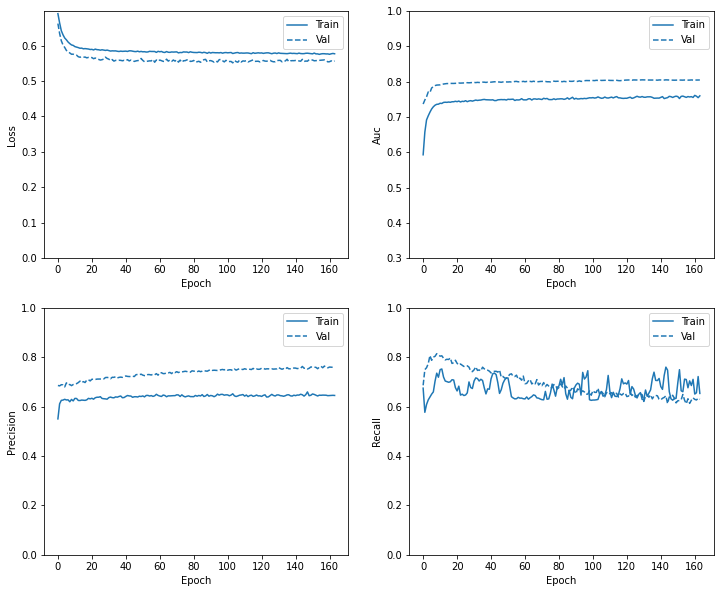

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5556675791740417
tp :  2711.0
fp :  879.0
tn :  3361.0
fn :  1502.0
accuracy :  0.7183248400688171
precision :  0.7551531791687012
recall :  0.6434844732284546
auc :  0.8055305480957031

(True Negatives):  3381
 (False Positives):  859
(False Negatives):  1526
 (True Positives):  2687
Total Transactions:  4213


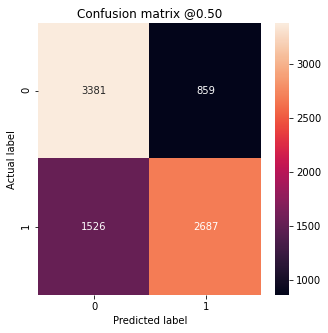

In [ ]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_baseline)

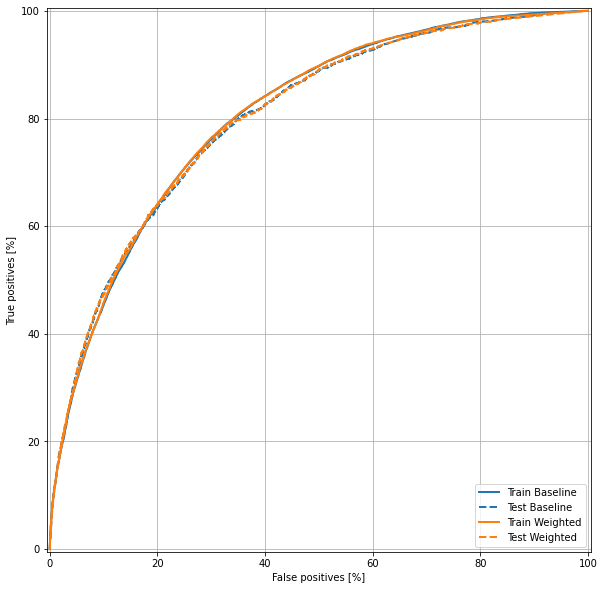

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(38024, 6)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(76048, 6)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [ 3.54921003 -0.62483459 -2.17698193  0.06235498  1.56902391  0.84214184]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 6), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5078125


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

298.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/200
298/298 [==============================] - 4s 8ms/step - loss: 0.6959 - tp: 16066.3913 - fp: 16828.1940 - tn: 17443.1639 - fn: 5526.3946 - accuracy: 0.6156 - precision: 0.4744 - recall: 0.7470 - auc: 0.6845 - val_loss: 0.6614 - val_tp: 2856.0000 - val_fp: 1273.0000 - val_tn: 2967.0000 - val_fn: 1357.0000 - val_accuracy: 0.6889 - val_precision: 0.6917 - val_recall: 0.6779 - val_auc: 0.7363
Epoch 2/200
298/298 [==============================] - 1s 5ms/step - loss: 0.6685 - tp: 11092.9130 - fp: 7005.7759 - tn: 12187.0769 - fn: 8113.3779 - accuracy: 0.6048 - precision: 0.6133 - recall: 0.5730 - auc: 0.6459 - val_loss: 0.6332 - val_tp: 3115.0000 - val_fp: 1415.0000 - val_tn: 2825.0000 - val_fn: 1098.0000 - val_accuracy: 0.7027 - val_precision: 0.6876 - val_recall: 0.7394 - val_auc: 0.7401
Epoch 3/200
298/298 [==============================] - 1s 5ms/step - loss: 0.6466 - tp: 11546.4348 - fp: 7022.5853 - tn: 12212.3278 - fn: 7617.7960 - accuracy: 0.6180 - precision: 0.6212 - reca

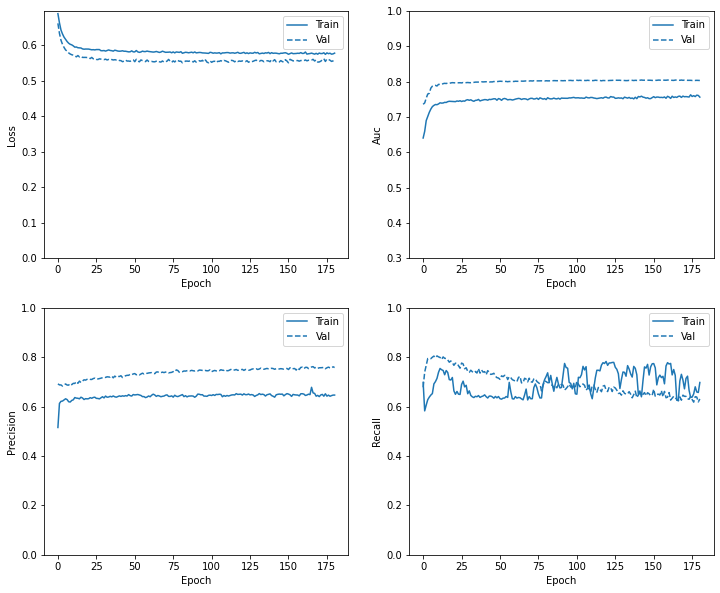

In [ ]:
plot_metrics(resampled_history)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=2*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/400
20/20 [==============================] - 3s 53ms/step - loss: 0.7012 - tp: 3800.4762 - fp: 1968.9524 - tn: 3654.0952 - fn: 1833.2857 - accuracy: 0.6654 - precision: 0.6667 - recall: 0.6721 - auc: 0.7492 - val_loss: 0.6930 - val_tp: 4213.0000 - val_fp: 4240.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.4984 - val_precision: 0.4984 - val_recall: 1.0000 - val_auc: 0.5891
Epoch 2/400
20/20 [==============================] - 0s 9ms/step - loss: 0.7003 - tp: 1156.9524 - fp: 1081.9524 - tn: 275.6667 - fn: 289.2381 - accuracy: 0.5135 - precision: 0.5222 - recall: 0.7999 - auc: 0.5082 - val_loss: 0.6914 - val_tp: 4213.0000 - val_fp: 4240.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.4984 - val_precision: 0.4984 - val_recall: 1.0000 - val_auc: 0.6445
Epoch 3/400
20/20 [==============================] - 0s 10ms/step - loss: 0.6989 - tp: 1103.0000 - fp: 1108.3810 - tn: 290.0000 - fn: 302.4286 - accuracy: 0.4965 - precision: 0.4952 - recall: 0.7874 

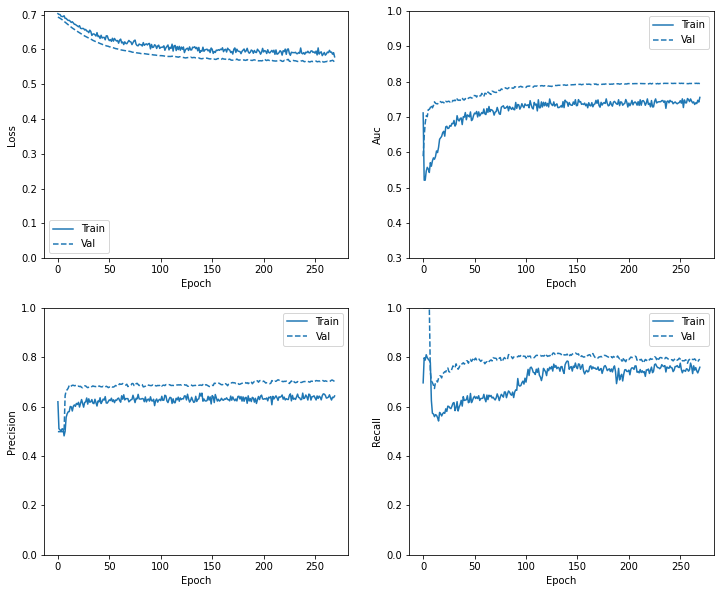

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_resampled = resampled_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5651955604553223
tp :  3353.0
fp :  1441.0
tn :  2799.0
fn :  860.0
accuracy :  0.7277889251708984
precision :  0.699415922164917
recall :  0.7958699464797974
auc :  0.7958680391311646

(True Negatives):  2799
 (False Positives):  1441
(False Negatives):  860
 (True Positives):  3353
Total Transactions:  4213


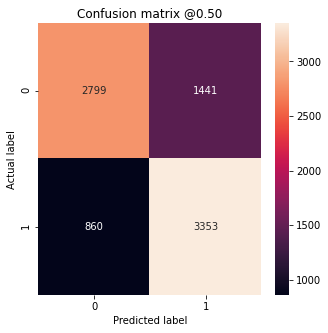

In [ ]:
resampled_results = resampled_model.evaluate(val_features, val_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_resampled)

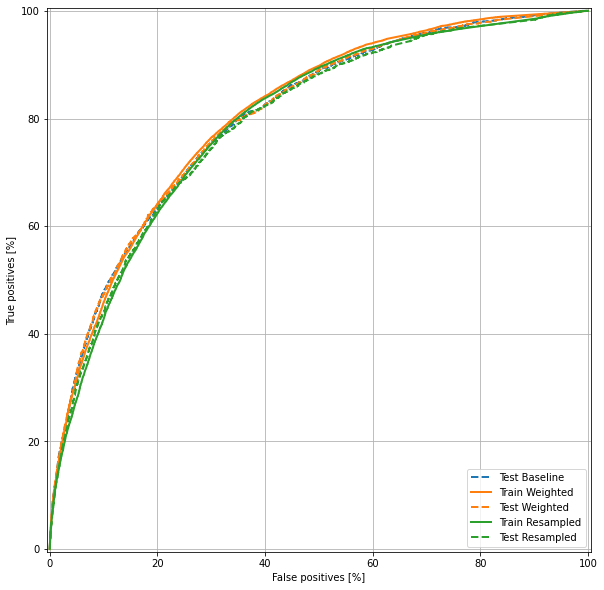

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')